![alt text](data/img/-HAZTE-CON-EL-MEJOR-17-4-2024.png)

## Importar módulos y bibliotecas

In [84]:
import requests
from bs4 import BeautifulSoup
from simplejson import JSONDecodeError
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import csv 
import seaborn as sns
import re
import plotly.graph_objects as go
from plotly.offline import iplot
import plotly.express as px
%run utils/PokeFunciones.py


## Cargar tabla de ventas históricas de los videojuegos.

In [85]:
# Hacer una solicitud GET a la página web
url = 'https://vandal.elespanol.com/noticia/1350766721/estos-son-los-juegos-de-pokemon-mas-vendidos-de-todos-los-tiempos-cual-es-el-numero-1/'
respuesta = requests.get(url)
soup = BeautifulSoup(respuesta.content, 'html.parser')
tabla = soup.find('table')
encabezados = tabla.find_all('th')
nombres_columnas = [encabezado.text.strip() for encabezado in encabezados]

filas = tabla.find_all('tr')
datos = []

for fila in filas:
    celdas = fila.find_all('td')
    fila_datos = [celda.text.strip() for celda in celdas]
    datos.append(fila_datos)

ventas = pd.DataFrame(datos[1:], columns=nombres_columnas)
ventas

,#,Juego,Ańo,Ventas a nivel mundial,Plataforma
0,1,Pokémon Rojo y Azul,1996,"31,37 millones",Game Boy
1,2,Pokémon Espada y Escudo,2019,"26,02 millones",Nintendo Switch
2,3,Pokémon Oro y Plata,1999,"23,73 millones",Game Boy Color
3,4,Pokémon Escarlata y Púrpura,2022,"23,23 millones",Nintendo Switch
4,5,Pokémon Diamond & Pearl,2006,"17,67 millones",Nintendo DS
5,6,Pokémon X/Y,2013,"16,45 millones",Nintendo 3DS
6,7,Pokémon Rubí y Zafiro,2002,"16,22 millones",Game Boy Advance
7,8,Pokémon Sol y Luna,2016,"16,18 millones",Nintendo 3DS
8,9,Pokémon Edición Negra y Blanca,2010,"15,64 millones",Nintendo DS
9,10,"Pokémon: Let's Go, Pikachu! / Let's Go, Eevee!",2018,"15,07 millones",Nintendo Switch


In [86]:
# Guardo el dataset en tres formatos distintos 
ventas.to_csv('./data/ventas.csv', index=False)
ventas.to_excel('./data/ventas.xlsx', index=False)
ventas.to_json('./data/ventas.json', orient='records')

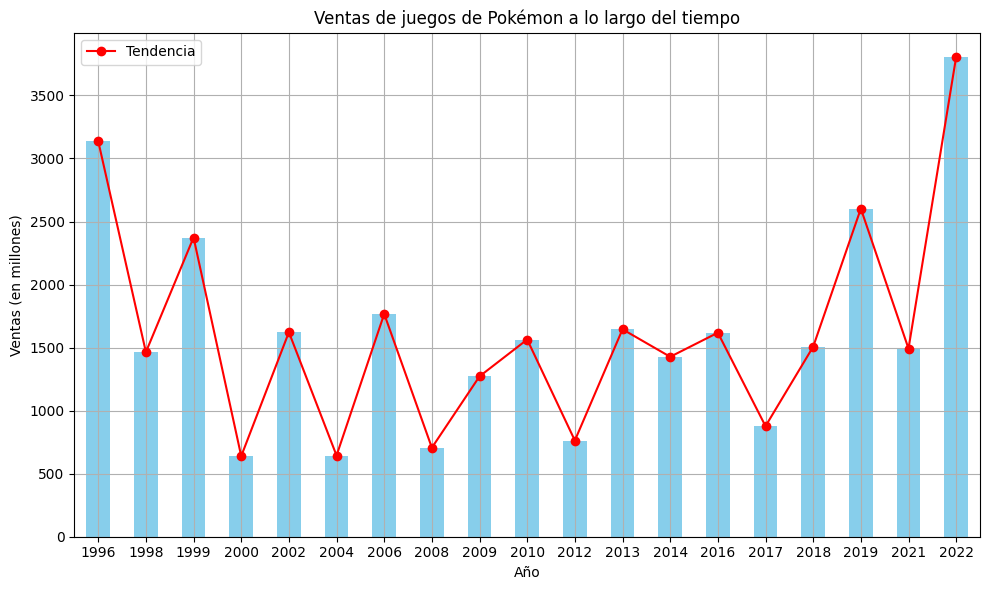

In [87]:
# Convertir la columna "Ventas a nivel mundial" a cadena (string) y limpiar las cadenas
ventas["Ventas a nivel mundial"] = ventas["Ventas a nivel mundial"].astype(str).str.replace(" millones", "").str.replace(",", "").astype(float)
ventas_por_año = ventas.groupby("Ańo")["Ventas a nivel mundial"].sum()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ventas_por_año.plot(kind='bar', color='skyblue')

# Añadir una línea para indicar la tendencia
ventas_por_año.plot(kind='line', color='red', marker='o')

# Etiquetas y título
plt.xlabel("Año")
plt.ylabel("Ventas (en millones)")
plt.title("Ventas de juegos de Pokémon a lo largo del tiempo")

# Mostrar el gráfico
plt.grid(True)
plt.legend(['Tendencia'])
plt.tight_layout()
plt.savefig('./data/img/histo_ventas.png', transparent=True)# Guardar la gráfica como imagen
plt.show()

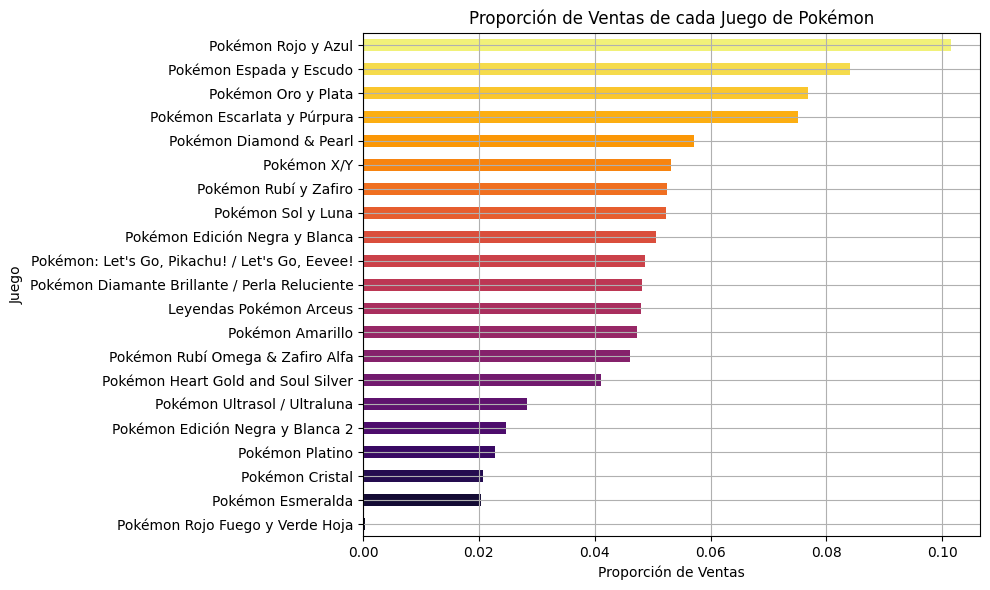

In [88]:
# Calcular la proporción de ventas de cada juego
proporcion_ventas = ventas.groupby("Juego")["Ventas a nivel mundial"].sum() / ventas["Ventas a nivel mundial"].sum()

# Ordenar los juegos por proporción de ventas
proporcion_ventas = proporcion_ventas.sort_values(ascending=True)

# Elegir una paleta de colores
paleta_colores = sns.color_palette("inferno", len(proporcion_ventas))

# Crear el gráfico de barras horizontales con colores diferentes para cada juego
plt.figure(figsize=(10, 6))
proporcion_ventas.plot(kind='barh', color=paleta_colores)

# Título y etiquetas
plt.xlabel('Proporción de Ventas')
plt.ylabel('Juego')
plt.title('Proporción de Ventas de cada Juego de Pokémon')

# Mostrar el gráfico
plt.grid(True)
plt.savefig('./data/img/barrlat_ventas.png', transparent=True)# Guardar la gráfica como imagen
plt.tight_layout()
plt.show()

- Hasta aqui tan solo hice webscrapping para cargar la tabla de las ventas de videojuegos históricas, esta información no es nada relevante a la hora de analizar el dataset de pokemon, pero es información que ayuda a comprender mejor todo el entorno Pokémon.

## Cargar Dataset principal: Pokémon 
<center>
    <img src="data/img/pngwing.com (1).png" alt="pika1" width="200"/>
    <img src="data/img/pngwing.com (2).png" alt="pika2" width="200"/>
    <img src="data/img/pngwing.com (3).png" alt="pika3" width="200"/>
    <img src="data/img/pngwing.com (4).png" alt="pika4" width="200"/>
</center>

In [89]:
# Cargar datos del dataframe con el que vamos a trabajar
pokemon = pd.read_csv('./data/pokemons2.csv')
pokemon

,index,name,rank,generation,evolves_from,type1,type2,hp,atk,def,spatk,spdef,speed,total,height,weight,abilities,desc
0,1,bulbasaur,ordinary,generation-i,nothing,grass,poison,45,49,49,65,65,45,318,7,69,overgrow chlorophyll,A strange seed was planted on its back at birt...
1,2,ivysaur,ordinary,generation-i,bulbasaur,grass,poison,60,62,63,80,80,60,405,10,130,overgrow chlorophyll,"When the bulb on its back grows large, it appe..."
2,3,venusaur,ordinary,generation-i,ivysaur,grass,poison,80,82,83,100,100,80,525,20,1000,overgrow chlorophyll,The plant blooms when it is absorbing solar en...
3,4,charmander,ordinary,generation-i,nothing,fire,NaN,39,52,43,60,50,65,309,6,85,blaze solar-power,"Obviously prefers hot places. When it rains, s..."
4,5,charmeleon,ordinary,generation-i,charmander,fire,NaN,58,64,58,80,65,80,405,11,190,blaze solar-power,"When it swings its burning tail, it elevates t..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1021,raging-bolt,ordinary,generation-ix,nothing,electric,dragon,125,73,91,137,89,75,590,52,4800,protosynthesis,Not Available
1021,1022,iron-boulder,ordinary,generation-ix,nothing,rock,psychic,90,120,80,68,108,124,590,15,1625,quark-drive,Not Available
1022,1023,iron-crown,ordinary,generation-ix,nothing,steel,psychic,90,72,100,122,108,98,590,16,1560,quark-drive,Not Available
1023,1024,terapagos,legendary,generation-ix,nothing,normal,NaN,90,65,85,65,85,60,450,2,65,tera-shift,Not Available


In [90]:
# Eliminar las columnas que no vamos a necesitar
columnas_a_eliminar = ['abilities','desc','height','weight']
pokemon = pokemon.drop(columnas_a_eliminar, axis=1)
pokemon

,index,name,rank,generation,evolves_from,type1,type2,hp,atk,def,spatk,spdef,speed,total
0,1,bulbasaur,ordinary,generation-i,nothing,grass,poison,45,49,49,65,65,45,318
1,2,ivysaur,ordinary,generation-i,bulbasaur,grass,poison,60,62,63,80,80,60,405
2,3,venusaur,ordinary,generation-i,ivysaur,grass,poison,80,82,83,100,100,80,525
3,4,charmander,ordinary,generation-i,nothing,fire,NaN,39,52,43,60,50,65,309
4,5,charmeleon,ordinary,generation-i,charmander,fire,NaN,58,64,58,80,65,80,405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1021,raging-bolt,ordinary,generation-ix,nothing,electric,dragon,125,73,91,137,89,75,590
1021,1022,iron-boulder,ordinary,generation-ix,nothing,rock,psychic,90,120,80,68,108,124,590
1022,1023,iron-crown,ordinary,generation-ix,nothing,steel,psychic,90,72,100,122,108,98,590
1023,1024,terapagos,legendary,generation-ix,nothing,normal,NaN,90,65,85,65,85,60,450


- Mi primer paso es eliminar las columnas que no voy a necesitar para mi análisis.

In [91]:
filltype(pokemon)
pokemon

,index,name,rank,generation,evolves_from,type1,type2,hp,atk,def,spatk,spdef,speed,total
0,1,bulbasaur,ordinary,generation-i,nothing,grass,poison,45,49,49,65,65,45,318
1,2,ivysaur,ordinary,generation-i,bulbasaur,grass,poison,60,62,63,80,80,60,405
2,3,venusaur,ordinary,generation-i,ivysaur,grass,poison,80,82,83,100,100,80,525
3,4,charmander,ordinary,generation-i,nothing,fire,fire,39,52,43,60,50,65,309
4,5,charmeleon,ordinary,generation-i,charmander,fire,fire,58,64,58,80,65,80,405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1021,raging-bolt,ordinary,generation-ix,nothing,electric,dragon,125,73,91,137,89,75,590
1021,1022,iron-boulder,ordinary,generation-ix,nothing,rock,psychic,90,120,80,68,108,124,590
1022,1023,iron-crown,ordinary,generation-ix,nothing,steel,psychic,90,72,100,122,108,98,590
1023,1024,terapagos,legendary,generation-ix,nothing,normal,normal,90,65,85,65,85,60,450


- Para eliminar los nulos de la columna 'type2', la mejor solución que se me ocurre es darle el mismo valor que tenga para 'type1', de esta manera tendrá dos tipos pero conservando su tipo original.

In [92]:
# Aplicar la capitalización del título a todas las celdas que contienen texto
pokemon = pokemon.map(lambda x: x.title() if isinstance(x, str) else x)
pokemon

,index,name,rank,generation,evolves_from,type1,type2,hp,atk,def,spatk,spdef,speed,total
0,1,Bulbasaur,Ordinary,Generation-I,Nothing,Grass,Poison,45,49,49,65,65,45,318
1,2,Ivysaur,Ordinary,Generation-I,Bulbasaur,Grass,Poison,60,62,63,80,80,60,405
2,3,Venusaur,Ordinary,Generation-I,Ivysaur,Grass,Poison,80,82,83,100,100,80,525
3,4,Charmander,Ordinary,Generation-I,Nothing,Fire,Fire,39,52,43,60,50,65,309
4,5,Charmeleon,Ordinary,Generation-I,Charmander,Fire,Fire,58,64,58,80,65,80,405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1021,Raging-Bolt,Ordinary,Generation-Ix,Nothing,Electric,Dragon,125,73,91,137,89,75,590
1021,1022,Iron-Boulder,Ordinary,Generation-Ix,Nothing,Rock,Psychic,90,120,80,68,108,124,590
1022,1023,Iron-Crown,Ordinary,Generation-Ix,Nothing,Steel,Psychic,90,72,100,122,108,98,590
1023,1024,Terapagos,Legendary,Generation-Ix,Nothing,Normal,Normal,90,65,85,65,85,60,450


- Aplico capitalización de la primera letra a todo el dataset, meramente visual.

In [93]:
# Aplicar la función clean generation a la columna 'generation'
pokemon['generation'] = pokemon['generation'].apply(clean_generation)

# Cambiar los numeros romanos de la columna generación a arábigos para evitar problemas con las gráficas
roman_to_arabic = {
    'I': 1,
    'II': 2,
    'III': 3,
    'IV': 4,
    'V': 5,
    'VI': 6,
    'VII': 7,
    'VIII': 8,
    'IX': 9
}

# Establecer la opción para optar por el comportamiento futuro
pd.set_option('future.no_silent_downcasting', True)
# Mapear los números romanos a números arábigos en la columna 'generation'
pokemon['generation'] = pokemon['generation'].replace(roman_to_arabic)

- Aplico la función clean_generation, la cual recurre a una expresión regular para limpiar la columna 'generation' dejándola sólo con números romanos. Avanzando en el análisis me doy cuenta de que me trae problemas tener las generaciones representadas en romanos, por lo que me veo forzado a cambiar a numeros arábigos.
    - Establezco la opción de comportamiento futuro para evitar los warning que puedan surgir.

In [94]:
# Reemplazo 'Nothing' por 'Original' en la columna 'evolves from'
pokemon['evolves_from'] = pokemon['evolves_from'].replace('Nothing', 'Original')
pokemon

,index,name,rank,generation,evolves_from,type1,type2,hp,atk,def,spatk,spdef,speed,total
0,1,Bulbasaur,Ordinary,1,Original,Grass,Poison,45,49,49,65,65,45,318
1,2,Ivysaur,Ordinary,1,Bulbasaur,Grass,Poison,60,62,63,80,80,60,405
2,3,Venusaur,Ordinary,1,Ivysaur,Grass,Poison,80,82,83,100,100,80,525
3,4,Charmander,Ordinary,1,Original,Fire,Fire,39,52,43,60,50,65,309
4,5,Charmeleon,Ordinary,1,Charmander,Fire,Fire,58,64,58,80,65,80,405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1021,Raging-Bolt,Ordinary,9,Original,Electric,Dragon,125,73,91,137,89,75,590
1021,1022,Iron-Boulder,Ordinary,9,Original,Rock,Psychic,90,120,80,68,108,124,590
1022,1023,Iron-Crown,Ordinary,9,Original,Steel,Psychic,90,72,100,122,108,98,590
1023,1024,Terapagos,Legendary,9,Original,Normal,Normal,90,65,85,65,85,60,450


- Meramente visual de nuevo, por placer propio, cambio el valor 'nothing' por 'Original', palabra que se relaciona mejor con el mensaje a transmitir.

In [95]:
# Guardo el dataset en tres formatos distintos 
pokemon.to_csv('./data/pokemon.csv', index=False)
pokemon.to_excel('./data/pokemon.xlsx', index=False)
pokemon.to_json('./data/pokemon.json', orient='records')

- Guardo el dataset tras haber terminado la limpieza y correcciones visuales. En 3 formatos distintos por si surgen necesidades distintas.
- En las próximas celdas muestro información general, muestras del dataset, reviso que no haya nulos y muestra de estadísticas descriptivas.

In [96]:
nulos = pokemon.isnull().sum()
nulos

index           0
name            0
rank            0
generation      0
evolves_from    0
type1           0
type2           0
hp              0
atk             0
def             0
spatk           0
spdef           0
speed           0
total           0
dtype: int64

In [97]:
pokemon.describe().T

,count,mean,std,min,25%,50%,75%,max
index,1025.0,513.000000,296.036315,1.0,257.0,513.0,769.0,1025.0
hp,1025.0,70.184390,26.631054,1.0,50.0,68.0,85.0,255.0
atk,1025.0,77.521951,29.782541,5.0,55.0,75.0,100.0,181.0
def,1025.0,72.507317,29.286972,5.0,50.0,70.0,90.0,230.0
spatk,1025.0,70.080976,29.658378,10.0,47.0,65.0,90.0,173.0
spdef,1025.0,70.205854,26.639329,20.0,50.0,67.0,86.0,230.0
speed,1025.0,67.186341,28.717227,5.0,45.0,65.0,88.0,200.0
total,1025.0,427.686829,112.770735,175.0,325.0,450.0,508.0,720.0


In [98]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         1025 non-null   int64 
 1   name          1025 non-null   object
 2   rank          1025 non-null   object
 3   generation    1025 non-null   object
 4   evolves_from  1025 non-null   object
 5   type1         1025 non-null   object
 6   type2         1025 non-null   object
 7   hp            1025 non-null   int64 
 8   atk           1025 non-null   int64 
 9   def           1025 non-null   int64 
 10  spatk         1025 non-null   int64 
 11  spdef         1025 non-null   int64 
 12  speed         1025 non-null   int64 
 13  total         1025 non-null   int64 
dtypes: int64(8), object(6)
memory usage: 112.2+ KB


In [99]:
pokemon.head(10)

,index,name,rank,generation,evolves_from,type1,type2,hp,atk,def,spatk,spdef,speed,total
0,1,Bulbasaur,Ordinary,1,Original,Grass,Poison,45,49,49,65,65,45,318
1,2,Ivysaur,Ordinary,1,Bulbasaur,Grass,Poison,60,62,63,80,80,60,405
2,3,Venusaur,Ordinary,1,Ivysaur,Grass,Poison,80,82,83,100,100,80,525
3,4,Charmander,Ordinary,1,Original,Fire,Fire,39,52,43,60,50,65,309
4,5,Charmeleon,Ordinary,1,Charmander,Fire,Fire,58,64,58,80,65,80,405
5,6,Charizard,Ordinary,1,Charmeleon,Fire,Flying,78,84,78,109,85,100,534
6,7,Squirtle,Ordinary,1,Original,Water,Water,44,48,65,50,64,43,314
7,8,Wartortle,Ordinary,1,Squirtle,Water,Water,59,63,80,65,80,58,405
8,9,Blastoise,Ordinary,1,Wartortle,Water,Water,79,83,100,85,105,78,530
9,10,Caterpie,Ordinary,1,Original,Bug,Bug,45,30,35,20,20,45,195


In [100]:
pokemon.tail(10)

,index,name,rank,generation,evolves_from,type1,type2,hp,atk,def,spatk,spdef,speed,total
1015,1016,Fezandipiti,Legendary,9,Original,Poison,Fairy,88,91,82,70,125,99,555
1016,1017,Ogerpon,Legendary,9,Original,Grass,Grass,80,120,84,60,96,110,550
1017,1018,Archaludon,Ordinary,9,Duraludon,Steel,Dragon,90,105,130,125,65,85,600
1018,1019,Hydrapple,Ordinary,9,Dipplin,Grass,Dragon,106,80,110,120,80,44,540
1019,1020,Gouging-Fire,Ordinary,9,Original,Fire,Dragon,105,115,121,65,93,91,590
1020,1021,Raging-Bolt,Ordinary,9,Original,Electric,Dragon,125,73,91,137,89,75,590
1021,1022,Iron-Boulder,Ordinary,9,Original,Rock,Psychic,90,120,80,68,108,124,590
1022,1023,Iron-Crown,Ordinary,9,Original,Steel,Psychic,90,72,100,122,108,98,590
1023,1024,Terapagos,Legendary,9,Original,Normal,Normal,90,65,85,65,85,60,450
1024,1025,Pecharunt,Mythical,9,Original,Poison,Ghost,88,88,160,88,88,88,600


- Tras echar una ojeada por encima al dataset en el que vamos a trabajar, quiero tener una visualización, tambien general, de cuantos pokemon hay y, ya puestos, separados por generaciones.

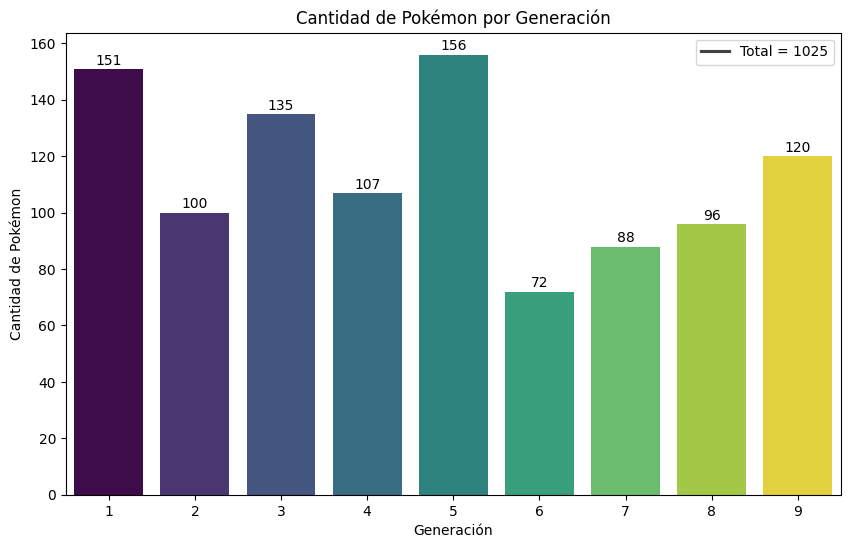

In [101]:
# Calcular la suma total de Pokémon por generación
total_pokemon_por_generacion = pokemon['generation'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=total_pokemon_por_generacion.index, y=total_pokemon_por_generacion.values, hue=total_pokemon_por_generacion.index, palette='viridis', legend=False)
plt.title('Cantidad de Pokémon por Generación')
plt.xlabel('Generación')
plt.ylabel('Cantidad de Pokémon')

# Mostrar el valor de cada barra
for index, value in enumerate(total_pokemon_por_generacion.values):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom')

# Calcular la suma total de Pokémon
total_pokemon = total_pokemon_por_generacion.sum()

# Añadir leyenda con la suma total
plt.legend(['Total = {}'.format(total_pokemon)], loc='upper right')
plt.savefig('./data/img/grf_pokemon_por_generacion.png', transparent=True)# Guardar la gráfica como imagen
plt.show()


- A continuación voy visualizar la distribución de todas las estadísticas para hacerme una idea de en que puntos hay mayor concentración de valores y los rangos en los que se mueven.

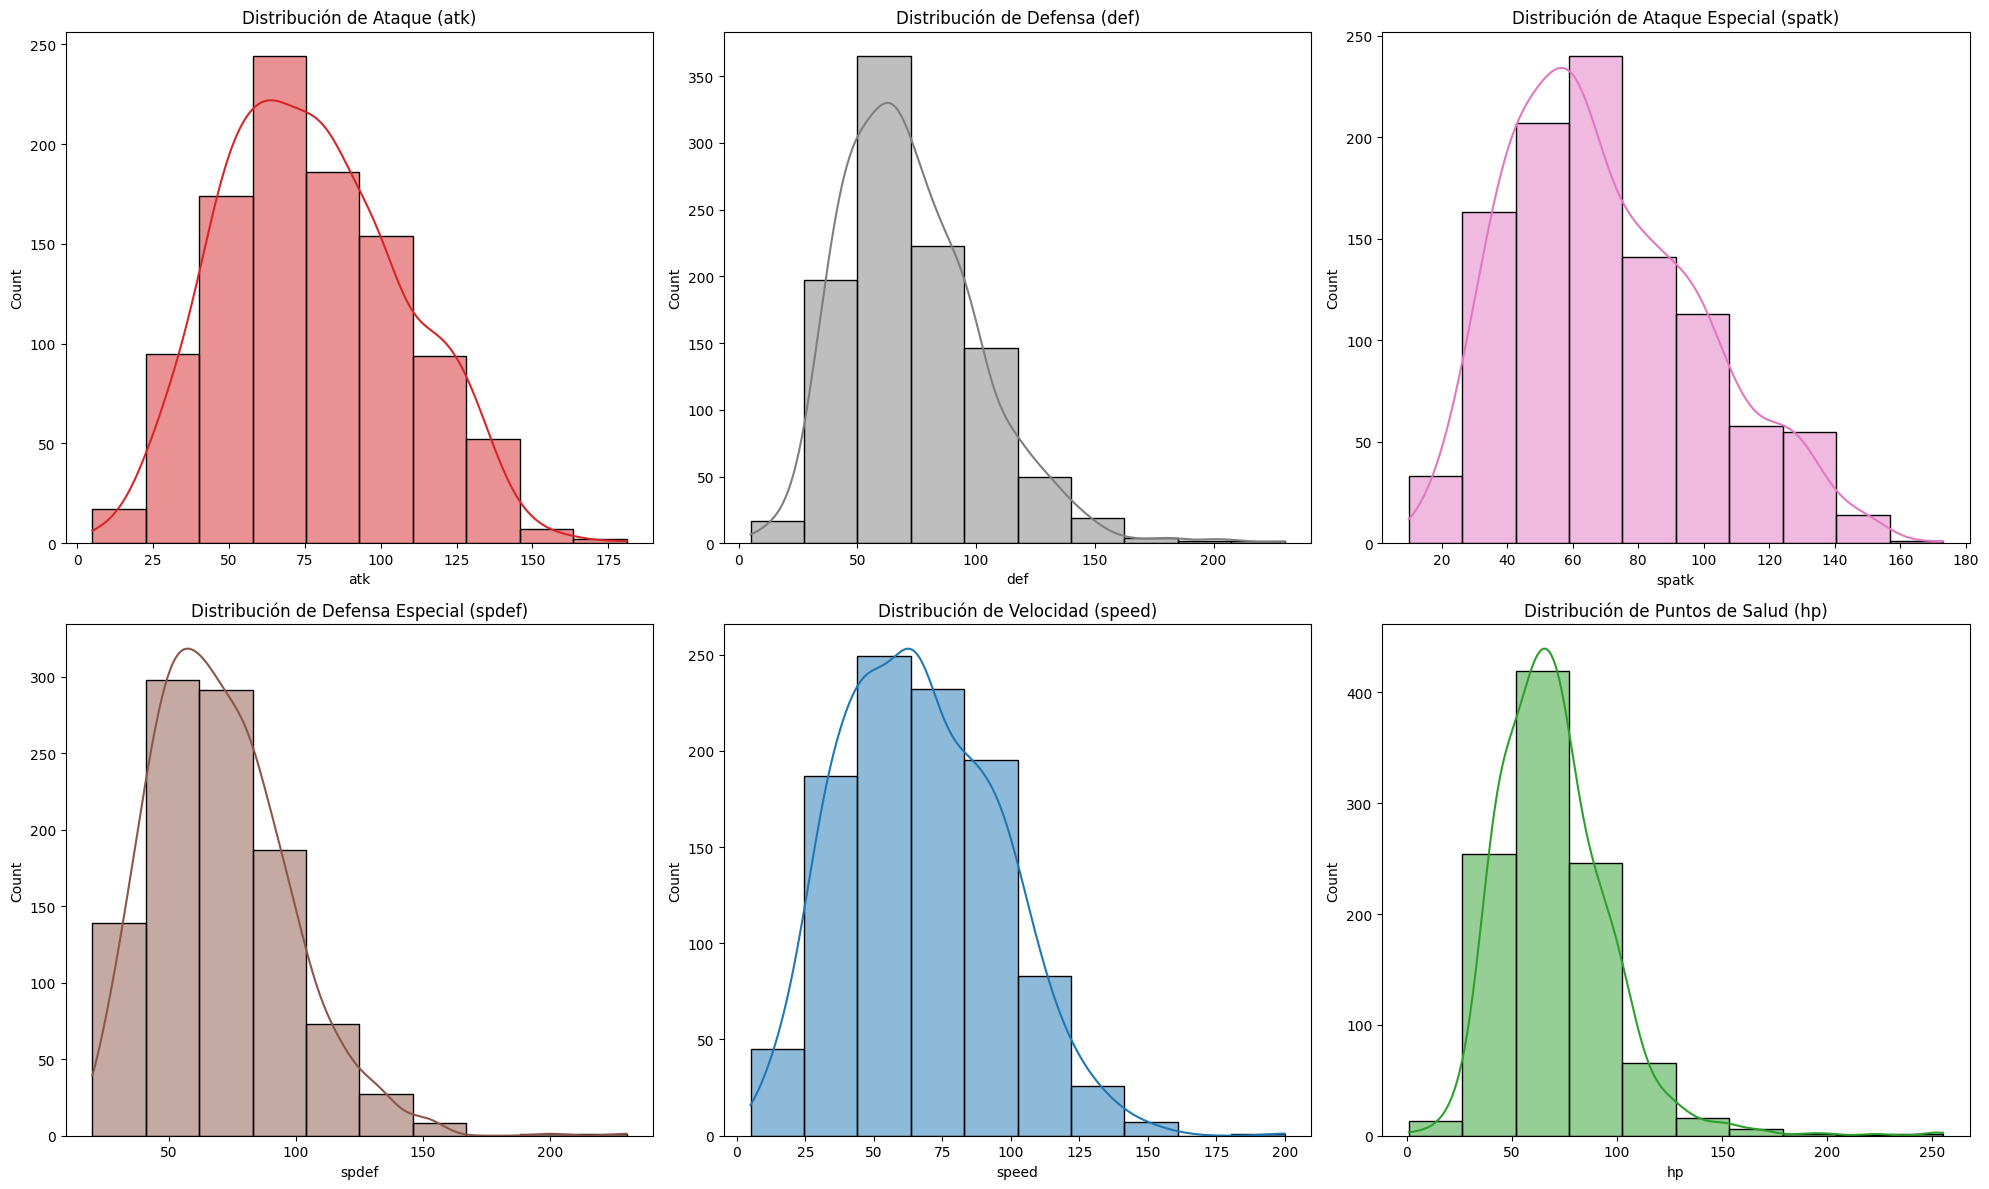

In [102]:
# Crear una figura con una rejilla de 2x3 subgráficos
f, axes = plt.subplots(2, 3, figsize=(20, 12))

# Distribución de Ataque (atk)
x = pokemon['atk']
sns.histplot(x, bins=10, color="tab:red", kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribución de Ataque (atk)')

# Distribución de Defensa (def)
x = pokemon['def']
sns.histplot(x, bins=10, color="tab:grey", kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribución de Defensa (def)')

# Distribución de Ataque Especial (spatk)
x = pokemon['spatk']
sns.histplot(x, bins=10, color="tab:pink", kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Distribución de Ataque Especial (spatk)')

# Distribución de Defensa Especial (spdef)
x = pokemon['spdef']
sns.histplot(x, bins=10, color="tab:brown", kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribución de Defensa Especial (spdef)')

# Distribución de Velocidad (speed)
x = pokemon['speed']
sns.histplot(x, bins=10, color="tab:blue", kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribución de Velocidad (speed)')

# Distribución de Puntos de Salud (hp)
x = pokemon['hp']
sns.histplot(x, bins=10, color="tab:green", kde=True, ax=axes[1, 2])
axes[1, 2].set_title('Distribución de Puntos de Salud (hp)')

plt.tight_layout()
plt.savefig('./data/img/grfs_distrib_stats.png', transparent=True)# Guardar la gráfica como imagen

# Mostrar la figura con los subgráficos
plt.show()


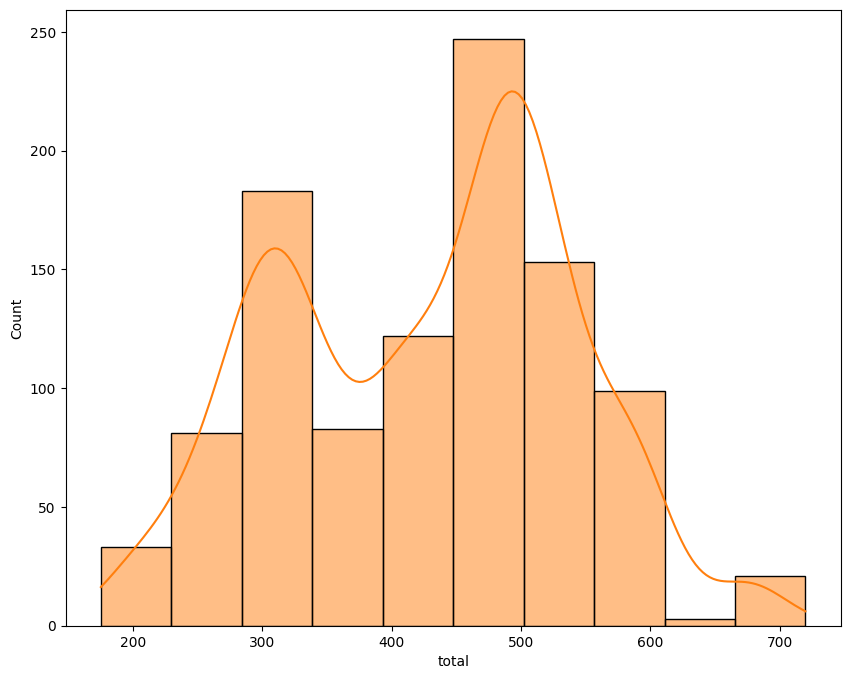

In [103]:
# Distribución total 
f, ax = plt.subplots(figsize=(10,8))
x = pokemon['total']
ax = sns.histplot(x, bins=10, color="tab:orange", kde=True)
plt.show()

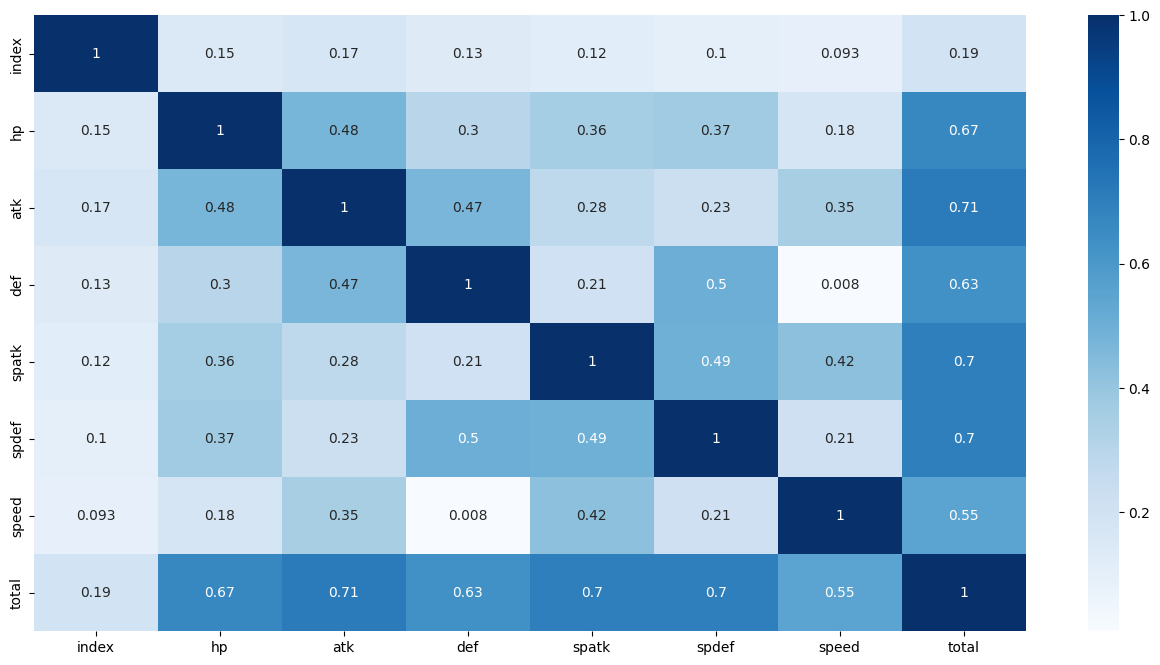

In [104]:
# Seleccionar solo las columnas numéricas del DataFrame
columnas_numericas = pokemon.select_dtypes(include=['int64', 'float64'])

# Calcular la correlación entre las características numéricas
correlacion = columnas_numericas.corr()

# Visualizar la correlación
plt.figure(figsize=(16,8))
sns.heatmap(correlacion, annot=True, cmap='Blues')
plt.savefig('./data/img/correlacion_stats.png', transparent=True)# Guardar la gráfica como imagen
plt.show()


- En este mapa de calor, vemos la correlación que hay entre las estadísticas de un pokemon:
    - Vemos como el ataque tiene más relación con la vida (hp) y la defensa, porque serán las estadísticas directas con lo que interactúe, seguida de la velocidad, que entedemos que es necesaria para un buen ataque y acabamos viendo que los puntos mas lejanos, fríos, son con las estadísticas de caracter especial, con las cuales no parece que haya mucha interacción.
    - En el caso del ataque especial comprobamos que las zonas de calor se concentran en la defensa especial, la cuál tiene sentido debido a que interactúa directamente, pero tambien en la velocidad, lo que sugiere que a grandes rasgos los pokemon que de caracacter especial son más rapidos atacantes que los fisicos.
    - Las defensas encuentran sus correlaciones sobretodo con sus correspondientes ataques seguidos de la vida. Destaca que el mayor punto de calor en ambas es con la otra defensa, lo que sugiere que pokemon que destacan en un estadística defensiva son potencialmente utilizados en su totalidad en defensa.

- Los siguientes dos diagramas de dispersión muestran la relacion entre el ataque y su defensa y el atq. especial y def. esp. Concluyo que el rango de ataque parece ser mayor que el de la defensa, mientras que el ataque especial se ve mas concentracion de valores en un rango más bajo. Esto sugiere que el estilo de juego predominante es físico.
 

<Figure size 1500x800 with 0 Axes>

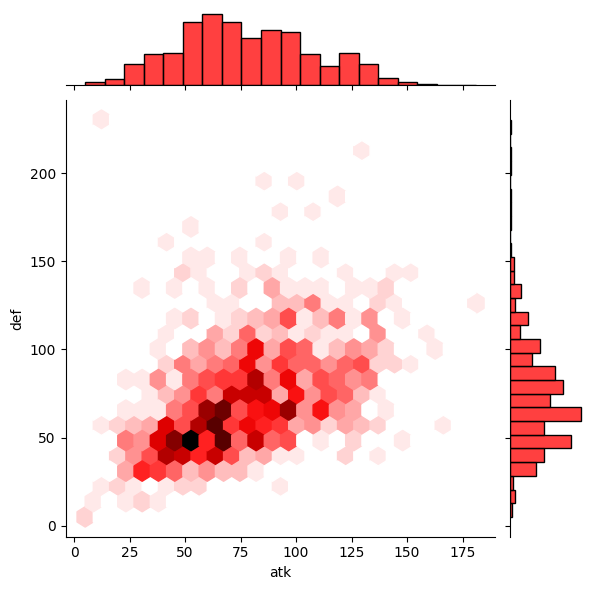

In [105]:
plt.figure(figsize=(15, 8))
sns.jointplot(x="atk", y="def", data=pokemon, kind="hex", color="red")
plt.savefig('./data/img/disp_atkdef.png', transparent=True)# Guardar la gráfica como imagen
plt.show()

<Figure size 1500x800 with 0 Axes>

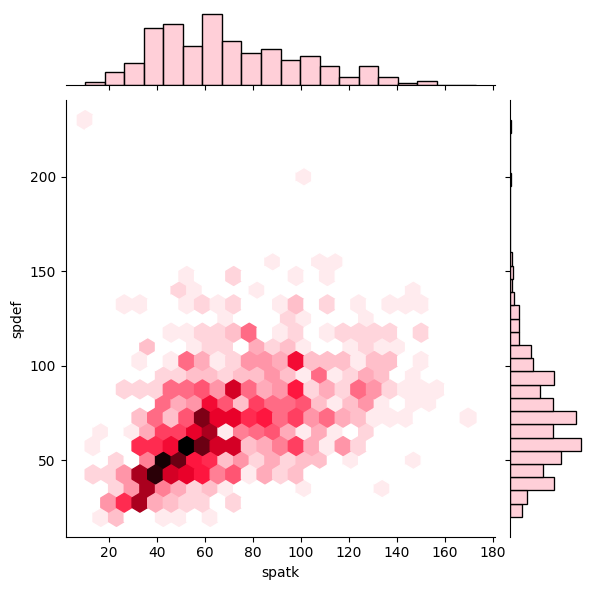

In [106]:
plt.figure(figsize=(15, 8))
sns.jointplot(x="spatk", y="spdef", data=pokemon, kind="hex", color="pink")
plt.savefig('./data/img/disp_spatspdef.png', transparent=True)# Guardar la gráfica como imagen
plt.show()

- Llegados a este punto ya hemos visto la distribución de pokemon por generación, hemos visto la distribución de sus estadísticas de combate y la relación que hay entre ellas. Además, ¡podemos deducir el estilo de juego que predomina!. Vamos por buen camino, entrenador.

- Quiero ver más datos sobre las estadísticas, pero voy a hacerlo en valores generales, así que usaré la columna total.
- Por otro lado, ¿y el tipo de pokemon?, quiero saber que tipo es el más repetido.


El tipo que más se repite es: 0    Water
Name: type1, dtype: object
La mediana del valor total de las características: 450.0
La media del total de características es: 427.6868292682927
La varianza entre el total de las caracteristicas de los pokemon es: 12717.23874237805
type1
Water       134
Normal      118
Grass       103
Bug          83
Fire         66
Psychic      60
Electric     59
Rock         58
Dark         45
Poison       42
Fighting     40
Ground       40
Dragon       37
Steel        36
Ghost        35
Ice          31
Fairy        29
Flying        9
Name: count, dtype: int64


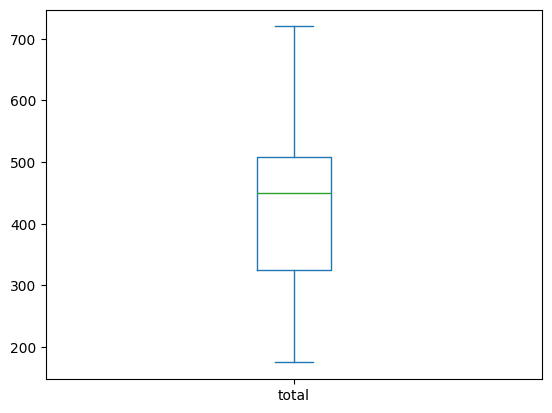

In [107]:
moda_pokemon = pokemon['type1'].mode()
pokemediana = pokemon['total'].median()
pokemedia = pokemon['total'].mean()
pokevarianza = pokemon['total'].var()
conteo_valores = pokemon['type1'].value_counts()
pokemon['total'].plot.box()
print("El tipo que más se repite es:", moda_pokemon)
print('La mediana del valor total de las características:', pokemediana)
print('La media del total de características es:', pokemedia)
print('La varianza entre el total de las caracteristicas de los pokemon es:', pokevarianza)
print(conteo_valores)

In [108]:
# Creo una lista con los colores en funcion del tipo para poder recurrir a ellos en las distintas graficas
pkmn_colores = [
    '#78C850',  # Grass
    '#F08030',  # Fire
    '#6890F0',  # Water
    '#A8B820',  # Bug
    '#A8A878',  # Normal
    '#A040A0',  # Poison
    '#F8D030',  # Electric
    '#E0C068',  # Ground
    '#EE99AC',  # Fairy
    '#C03028',  # Fighting
    '#F85888',  # Psychic
    '#B8A038',  # Rock
    '#705898',  # Ghost
    '#98D8D8',  # Ice
    '#7038F8',  # Dragon
    '#000000',  # Dark
    '#C0C0C0',  # Steel
    '#87CEEB',  # Flying
]

- Sigo pensando en los tipos, ahora que ya se que el tipo agua es el más común, quiero ver a grandes rasgos la distribución de pokemon por su tipo. 
- Viendo los colores finales predeterminados no me convencia nada el resultado, asi que previamente cree una lista con colores representativos de cada tipo para que así las visualizaciones sean mucho más entendibles y agradables.

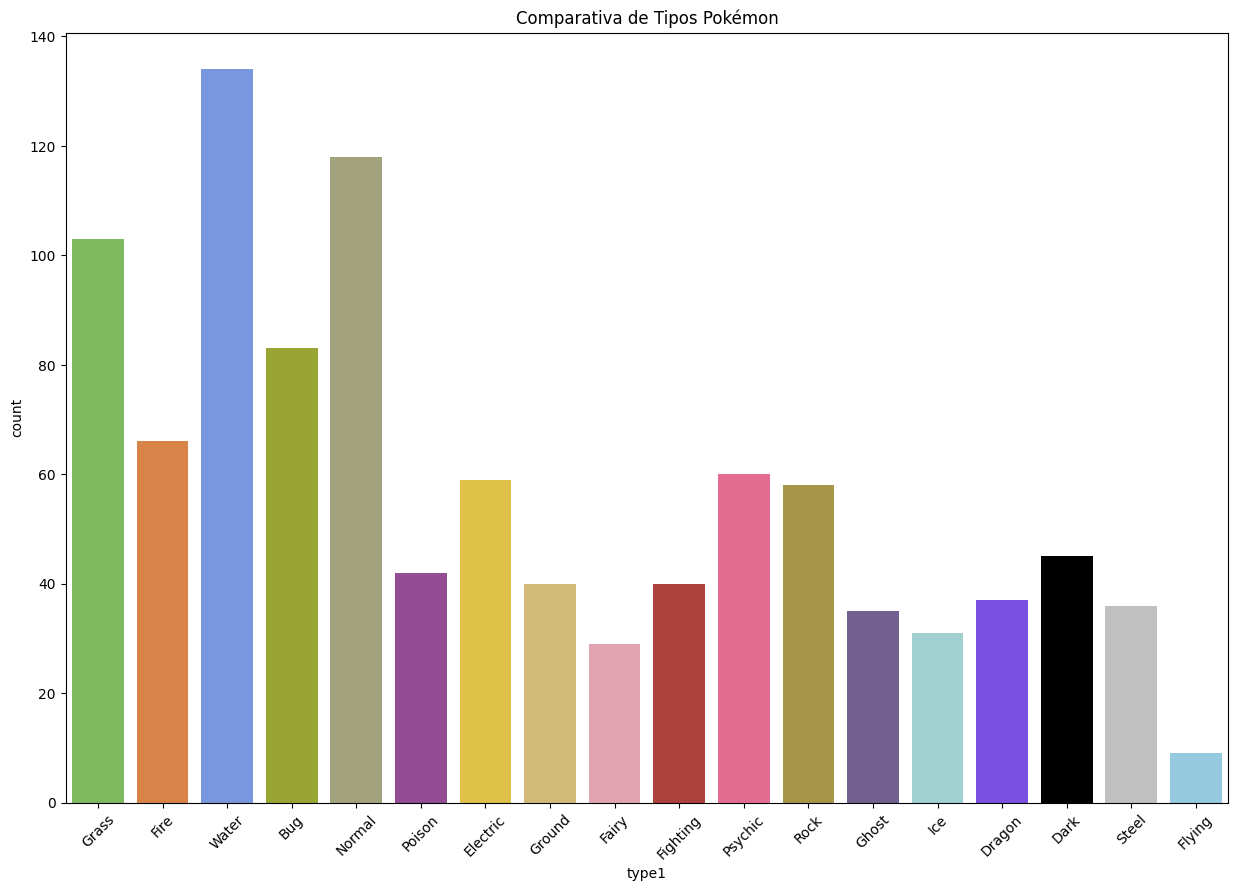

In [109]:
plt.figure(figsize=(15, 10))
sns.countplot(x='type1', data=pokemon, hue='type1', legend=False, palette=pkmn_colores)
plt.xticks(rotation=45)
plt.title('Comparativa de Tipos Pokémon')
plt.savefig('./data/img/barras_tipos.png', transparent=True)# Guardar la gráfica como imagen
plt.show()

In [110]:
fig = px.density_heatmap(pokemon, x="type1", y="type2", color_continuous_scale="blues")
fig.update_layout(width=800, height=600)
fig.show()

- Seguimos analizando los tipos, esta vez quisé ver un mapa de calor entre los tipos 1 y 2, para ver que combinaciones de tipos son las mas habituales, (Sorpresa! agua gana)
- Para terminar con el análisis de los tipos vamos a visualizar ambos tipos (1 y 2) en relación con el total de estadísticas de un pokemon, para la visualizarlo lo haremos con un gráfico de barras de violin, que le da un aspecto muy curioso combinado con la lista de colores pokemon.

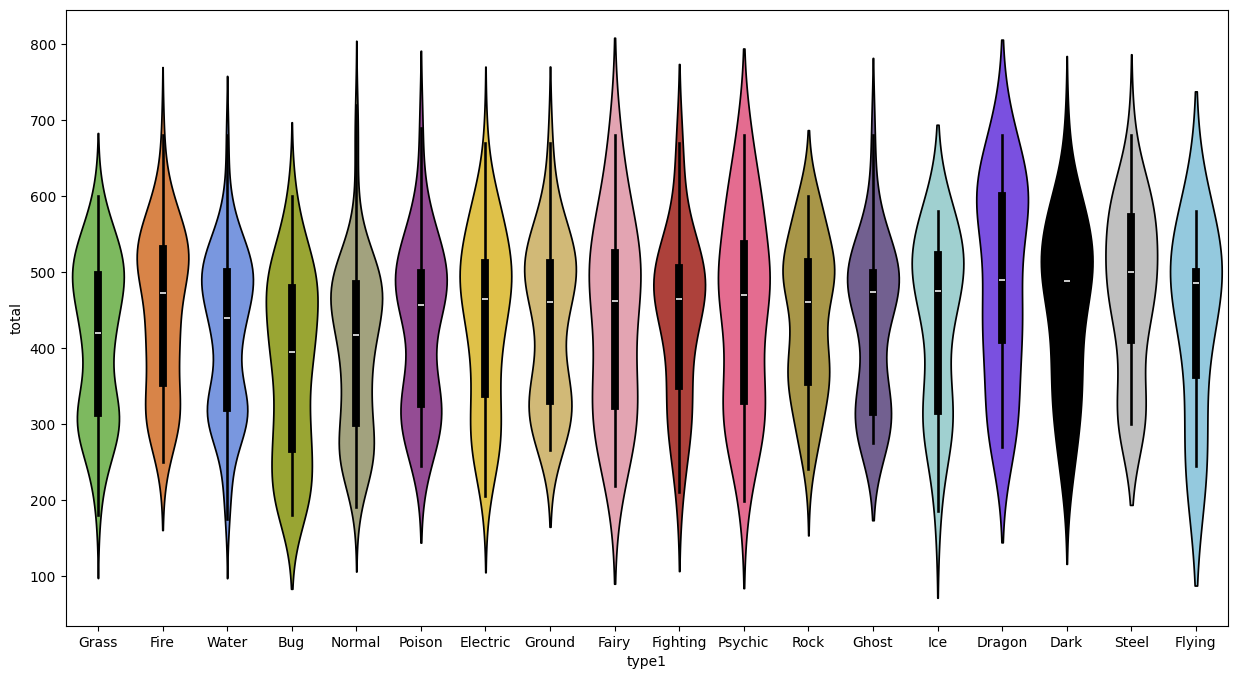

In [111]:
# Comparando la relacion del total de puntos con el tipo 1 del pokemon
plt.figure(figsize=(15, 8))
sns.violinplot(x=pokemon['type1'], y=pokemon['total'], hue=pokemon['type1'], palette=pkmn_colores, legend=False)
plt.show()

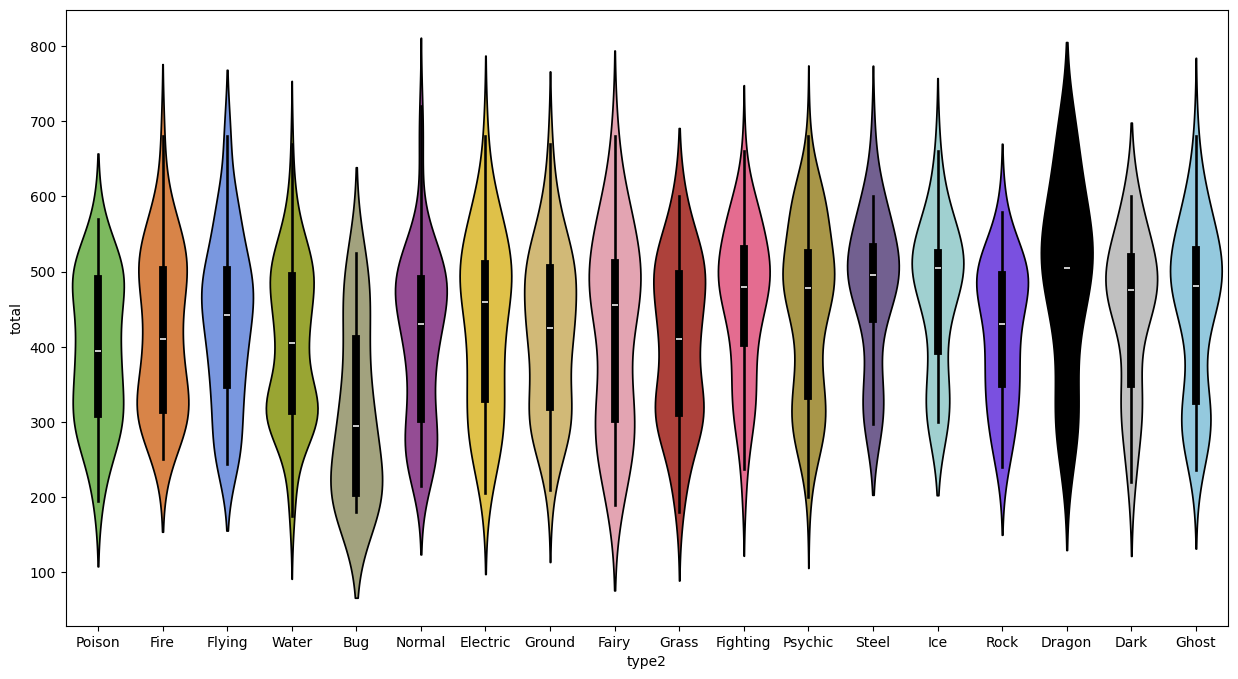

In [112]:
# Comparando la relacion del total de puntos con el tipo 2 del pokemon
plt.figure(figsize=(15, 8))
sns.violinplot(x=pokemon['type2'], y=pokemon['total'], hue=pokemon['type2'], palette=pkmn_colores, legend=False)
plt.show()

- Hemos visto lo que hemos podido sobre el tipo de los pokemon! creo que no nos va a ayudar mucho en nuestro camino a Maestro Pokemon, entrenador.

- Sigamos avanzando, ¿qué hay sobre las evoluciones?, veamos que pokemon son los que más evoluciones tienen, para ello tendremos que filtrar el resultado para limpiar la respuesta!

In [113]:
# Calcular la frecuencia de cada valor único en la columna "evolves from"
frecuencia_valores = pokemon['evolves_from'].value_counts()

# Seleccionar los tres valores más repetidos
top_valores_repetidos = frecuencia_valores.head(2)

print("Los valores más repetidos en la columna 'evolves from' son:")
print(top_valores_repetidos)


Los valores más repetidos en la columna 'evolves from' son:
evolves_from
Original    541
Eevee         8
Name: count, dtype: int64


In [114]:
# Filtrar la columna "evolves_from" excluyendo el valor "original"
datos_filtrados = pokemon[pokemon['evolves_from'] != 'Original']

# Contar la frecuencia de cada valor único en la columna "evolves_from"
conteo_valores = datos_filtrados['evolves_from'].value_counts()
conteo_valores.head(20)

evolves_from
Eevee        8
Applin       3
Tyrogue      3
Kirlia       2
Slowpoke     2
Wooper       2
Sneasel      2
Nincada      2
Poliwhirl    2
Charcadet    2
Gloom        2
Scyther      2
Meowth       2
Burmy        2
Yamask       2
Snorunt      2
Wurmple      2
Clamperl     2
Cosmoem      2
Bunnelby     1
Name: count, dtype: int64

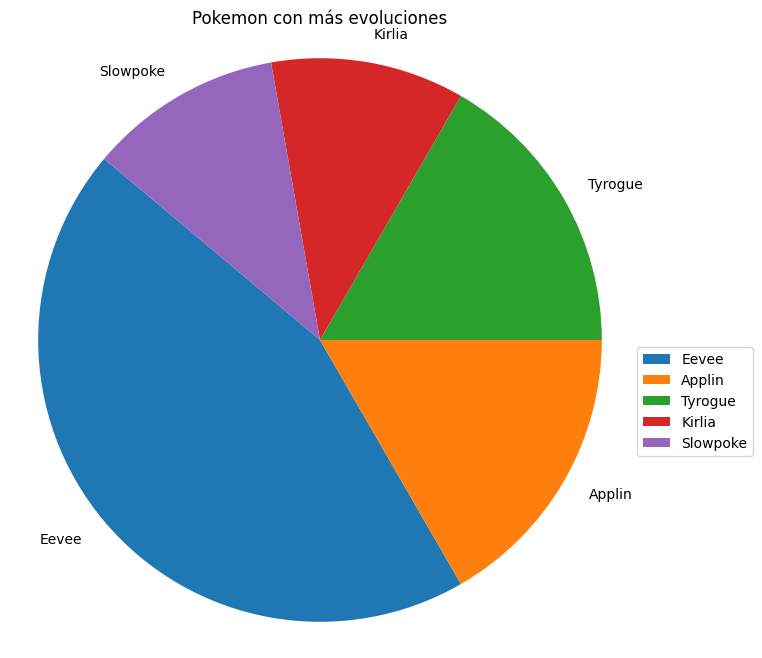

In [115]:
import matplotlib.pyplot as plt

# Filtrar la columna "evolves_from" excluyendo el valor "original"
datos_filtrados = pokemon[pokemon['evolves_from'] != 'Original']

# Contar la frecuencia de cada valor único en la columna "evolves_from"
conteo_valores = datos_filtrados['evolves_from'].value_counts()

# Filtrar los valores más comunes (excluyendo "original") para el gráfico
top_valores = conteo_valores.head(5)

# Crear el gráfico de tarta
plt.figure(figsize=(8, 8))
plt.pie(top_valores, labels=top_valores.index, startangle=140)
plt.title('Pokemon con más evoluciones')
plt.axis('equal')  # Para asegurarse de que el gráfico sea circular


plt.legend(labels=top_valores.index, loc='upper left', bbox_to_anchor=(1, 0.5))
plt.show()

- Como hemos comprobado, el pokemon que más opciones de evolución tiene es eevee, ¡8 sólo!, es un dato curioso cuánto menos, ¿verdad?. Pero la realidad es que saber esto tampoco nos convertirá en Maestros pokemon... 
<center>
    <img src="data/img/pngwing.com (8).png" alt="eevee" width="200"/>
</center>
- Vamos a ir directos al grano, vamos a averiguar cuales son los 5 mejores pokemon para cada atributo.

In [116]:
pokemon[pokemon['atk']>150][['name','rank','type1','hp','atk','def','spatk','spdef','speed','generation','total']].sort_values(by = 'atk',ascending = False).head(5)

,name,rank,type1,hp,atk,def,spatk,spdef,speed,generation,total
797,Kartana,Ordinary,Grass,59,181,131,59,31,109,7,570
408,Rampardos,Ordinary,Rock,97,165,60,65,50,58,4,495
288,Slaking,Ordinary,Normal,150,160,100,95,65,100,3,670
485,Regigigas,Legendary,Normal,110,160,110,80,110,100,4,670


In [117]:
pokemon[pokemon['def']>180][['name','rank','type1','hp','atk','def','spatk','spdef','speed','generation','total']].sort_values(by = 'def',ascending = False).head(5)

,name,rank,type1,hp,atk,def,spatk,spdef,speed,generation,total
212,Shuckle,Ordinary,Bug,20,10,230,10,230,5,2,505
804,Stakataka,Ordinary,Rock,61,131,211,53,101,13,7,570
207,Steelix,Ordinary,Steel,75,85,200,55,65,30,2,510
376,Regirock,Legendary,Rock,80,100,200,50,100,50,3,580
712,Avalugg,Ordinary,Ice,95,117,184,44,46,28,6,514


In [118]:
pokemon[pokemon['spatk']>130][['name','rank','type1','hp','atk','def','spatk','spdef','speed','generation','total']].sort_values(by = 'spatk',ascending = False).head(5)

,name,rank,type1,hp,atk,def,spatk,spdef,speed,generation,total
795,Xurkitree,Ordinary,Electric,83,89,71,173,71,83,7,570
149,Mewtwo,Legendary,Psychic,106,110,90,154,90,130,1,680
805,Blacephalon,Ordinary,Fire,53,127,53,151,79,107,7,570
383,Rayquaza,Legendary,Dragon,105,150,90,150,90,95,3,680
385,Deoxys,Mythical,Psychic,50,150,50,150,50,150,3,600


In [119]:
pokemon[pokemon['spdef']>150][['name','rank','type1','hp','atk','def','spatk','spdef','speed','generation','total']].sort_values(by = 'spdef',ascending = False).head(5)

,name,rank,type1,hp,atk,def,spatk,spdef,speed,generation,total
212,Shuckle,Ordinary,Bug,20,10,230,10,230,5,2,505
377,Regice,Legendary,Ice,80,50,100,100,200,50,3,580
248,Lugia,Legendary,Psychic,106,90,130,90,154,110,2,680
249,Ho-Oh,Legendary,Fire,106,130,90,110,154,90,2,680
670,Florges,Ordinary,Fairy,78,65,68,112,154,75,6,552


In [120]:
pokemon[pokemon['speed']>130][['name','rank','type1','hp','atk','def','spatk','spdef','speed','generation','total']].sort_values(by = 'speed',ascending = False).head(5)

,name,rank,type1,hp,atk,def,spatk,spdef,speed,generation,total
893,Regieleki,Legendary,Electric,80,100,50,100,50,200,8,580
290,Ninjask,Ordinary,Bug,61,90,45,50,50,160,3,456
794,Pheromosa,Ordinary,Bug,71,137,37,137,37,151,7,570
100,Electrode,Ordinary,Electric,60,50,70,80,80,150,1,490
385,Deoxys,Mythical,Psychic,50,150,50,150,50,150,3,600


In [121]:
pokemon[pokemon['hp']>150][['name','rank','type1','hp','atk','def','spatk','spdef','speed','generation','total']].sort_values(by = 'hp',ascending = False).head(5) #top 5 pokemon con más vida

,name,rank,type1,hp,atk,def,spatk,spdef,speed,generation,total
241,Blissey,Ordinary,Normal,255,10,10,75,135,55,2,540
112,Chansey,Ordinary,Normal,250,5,5,35,105,50,1,450
798,Guzzlord,Ordinary,Dark,223,101,53,97,53,43,7,570
894,Regidrago,Legendary,Dragon,200,100,50,100,50,80,8,580
201,Wobbuffet,Ordinary,Psychic,190,33,58,33,58,33,2,405


- Con todos estos datos ahora si que si podriamos hacernos un auténtico equipo con 6 pokémon y cada uno especialista en una característica, ¡nada mal entrenador!. 
    - Además, hemos encontrado datos curiosos, por ejemplo que no hay una dominancia absoluta de legendarios, lo que quiere decir que los legendarios no despuntan por normal general en una característica sino que su fuerza se basa en el equilibrio de todas. Que shuckle es el pokemon con mas defensas de ambas clases, ¿curioso no?, o por ejemplo que blissey y su preevolución, chansey, tienen dominado el podio de la vida!
    <center>
    <img src="data/img/pngwing.com (7).png" alt="shuckle" width="200"/>
    <img src="data/img/pngwing.com (6).png" alt="blissey" width="200"/>
</center>
- A continuación, te dejo un par de funciones:
    - 'Combate', función en la que puedes hacer comparaciones de hasta 5 pokemon, si quisieras menos sólo tienes que repetir alguno, te dejo un par de ejemplos de uso.
    - 'Compara', para comparar un atributo concreto entre dos pokemon, es más sencilla que la anterior pero tambien más fácil de comparar un atributo concreto.

In [122]:
combate(pokemon, 'Blissey', 'Blissey', 'Blissey', 'Blissey', 'Blissey')

In [123]:
# Realizo una prueba de un combate entre los 5 pokemon con más vida para ver el resultado
combate(pokemon, 'Blissey','Chansey','Guzzlord','Regidrago','Wobbuffet')

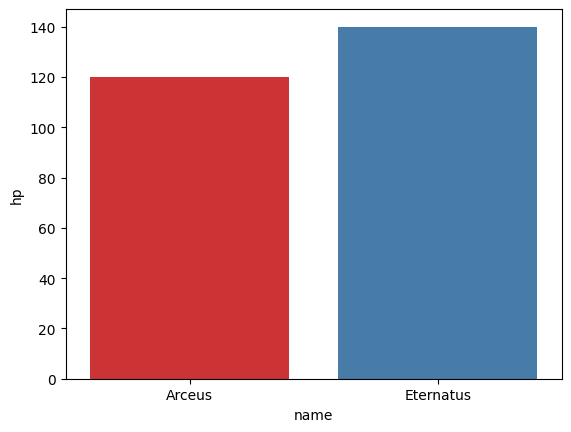

In [124]:
# Realizo una prueba de llamar al método para comparar atributos de dos pokemon para ver el resultado
compara(pokemon, 'Arceus','Eternatus','hp')

- La dominancia de Blissey en el atributo de vida me creó la necesidad de ver cuales eran los pokemon con menos vida.

In [125]:
## pokemon with least health
top_10_menoshp = pokemon.sort_values(by='hp', ascending=True).head(10)
top_10_menoshp

,index,name,rank,generation,evolves_from,type1,type2,hp,atk,def,spatk,spdef,speed,total
291,292,Shedinja,Ordinary,3,Nincada,Bug,Ghost,1,90,45,30,30,40,236
959,960,Wiglett,Ordinary,9,Original,Water,Water,10,55,25,35,25,95,245
49,50,Diglett,Ordinary,1,Original,Ground,Ground,10,55,25,35,45,95,265
348,349,Feebas,Ordinary,3,Original,Water,Water,20,15,20,10,55,80,200
438,439,Mime-Jr,Baby,4,Original,Psychic,Fairy,20,25,45,70,90,60,310
171,172,Pichu,Baby,2,Original,Electric,Electric,20,40,15,35,35,60,205
354,355,Duskull,Ordinary,3,Original,Ghost,Ghost,20,40,90,30,90,25,295
212,213,Shuckle,Ordinary,2,Original,Bug,Rock,20,10,230,10,230,5,505
128,129,Magikarp,Ordinary,1,Original,Water,Water,20,10,55,15,20,80,200
766,767,Wimpod,Ordinary,7,Original,Bug,Water,25,35,40,20,30,80,230


- ¡Sorpresa! Shedinja es el único pokémon con 1 hp, lo que le hace un caso especial, además siendo una evolución... Por desgracia nos faltan datos, pero todo apunta que algún tipo de estrategia sorprendentemente fuerte debe esconder este pokemon.!
<center>
<br><img src="data/img/pngwing.com.png" alt="shedinja" width="200"/>
<center>

- Está bien pararse a ver cosas curiosas por el camino, pero no nos desviemos de nuestro objetivo, encontrar el mejor pokemon. Veamos cuales son los mejores pokemon en base al total de sus estadísticas.

In [126]:
top_10_pokemons = pokemon.sort_values(by='total', ascending=False).head(10)
top_10_pokemons

,index,name,rank,generation,evolves_from,type1,type2,hp,atk,def,spatk,spdef,speed,total
492,493,Arceus,Mythical,4,Original,Normal,Normal,120,120,120,120,120,120,720
889,890,Eternatus,Legendary,8,Original,Poison,Dragon,140,85,95,145,95,130,690
383,384,Rayquaza,Legendary,3,Original,Dragon,Flying,105,150,90,150,90,95,680
643,644,Zekrom,Legendary,5,Original,Dragon,Electric,100,150,120,120,100,90,680
486,487,Giratina,Legendary,4,Original,Ghost,Dragon,150,100,120,100,120,90,680
483,484,Palkia,Legendary,4,Original,Water,Dragon,90,120,100,150,120,100,680
482,483,Dialga,Legendary,4,Original,Steel,Dragon,100,120,120,150,100,90,680
715,716,Xerneas,Legendary,6,Original,Fairy,Fairy,126,131,95,131,98,99,680
716,717,Yveltal,Legendary,6,Original,Dark,Flying,126,131,95,131,98,99,680
642,643,Reshiram,Legendary,5,Original,Dragon,Fire,100,120,100,150,120,90,680


- Vaya...! Nos encontramos un resultado lleno de legendarios, no sería un gran problema sino fuera por lo raros que son, necesitamos saber esta informacíon de los pokemon 'normales'.
Para ello usare un query excluyendo legendarios y míticos de la columna rank, veamos el resultado.

In [127]:
top_10_pokemon_excluyendo = pokemon.query("rank != 'Legendary' & rank != 'Mythical'").sort_values(by='total', ascending=False).head(10)
top_10_pokemon_excluyendo

,index,name,rank,generation,evolves_from,type1,type2,hp,atk,def,spatk,spdef,speed,total
288,289,Slaking,Ordinary,3,Vigoroth,Normal,Normal,150,160,100,95,65,100,670
783,784,Kommo-O,Ordinary,7,Hakamo-O,Dragon,Fighting,75,110,125,100,105,85,600
997,998,Baxcalibur,Ordinary,9,Arctibax,Dragon,Ice,115,145,92,75,86,87,600
148,149,Dragonite,Ordinary,1,Dragonair,Dragon,Flying,91,134,95,100,100,80,600
247,248,Tyranitar,Ordinary,2,Pupitar,Rock,Dark,100,134,110,95,100,61,600
372,373,Salamence,Ordinary,3,Shelgon,Dragon,Flying,95,135,80,110,80,100,600
375,376,Metagross,Ordinary,3,Metang,Steel,Psychic,80,135,130,95,90,70,600
1017,1018,Archaludon,Ordinary,9,Duraludon,Steel,Dragon,90,105,130,125,65,85,600
444,445,Garchomp,Ordinary,4,Gabite,Dragon,Ground,108,130,95,80,85,102,600
634,635,Hydreigon,Ordinary,5,Zweilous,Dark,Dragon,92,105,90,125,90,98,600


- Mucho mejor, empezamos a tener pinta de Maestro Pokémon!.
- Me llamo la atención que los legendarios se distinguen en míticos tambien:
    - Veamos un dataframe de solo pokemon legendarios y miticos.
    - A continuación, los organizaré por generaciones para poder guardar los dataframes resultantes, para posibles análisis futuros.

In [128]:
legendarios =pokemon[pokemon['rank']=='Legendary']  # Mostrar los pokemon legendarios
miticos = pokemon[pokemon['rank']== 'Mythical'] # Mostrar los pokemon miticos
legendarios_miticos = pokemon[(pokemon['rank'] == 'Legendary') | (pokemon['rank'] == 'Mythical')]

In [129]:
legendarios_miticos

,index,name,rank,generation,evolves_from,type1,type2,hp,atk,def,spatk,spdef,speed,total
143,144,Articuno,Legendary,1,Original,Ice,Flying,90,85,100,95,125,85,580
144,145,Zapdos,Legendary,1,Original,Electric,Flying,90,90,85,125,90,100,580
145,146,Moltres,Legendary,1,Original,Fire,Flying,90,100,90,125,85,90,580
149,150,Mewtwo,Legendary,1,Original,Psychic,Psychic,106,110,90,154,90,130,680
150,151,Mew,Mythical,1,Original,Psychic,Psychic,100,100,100,100,100,100,600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014,1015,Munkidori,Legendary,9,Original,Poison,Psychic,88,75,66,130,90,106,555
1015,1016,Fezandipiti,Legendary,9,Original,Poison,Fairy,88,91,82,70,125,99,555
1016,1017,Ogerpon,Legendary,9,Original,Grass,Grass,80,120,84,60,96,110,550
1023,1024,Terapagos,Legendary,9,Original,Normal,Normal,90,65,85,65,85,60,450


In [130]:
# Filtrar los datos para incluir solo los Pokémon legendarios y míticos de cada generación
legendarios_miticos_por_generacion = {}
for generacion in range(1, 10):  # Para cada generación del 1 al 9
    legendarios_miticos_generacion = pokemon[(pokemon['generation'] == generacion) & 
                                             ((pokemon['rank'] == 'Legendary') | (pokemon['rank'] == 'Mythical'))]
    legendarios_miticos_por_generacion[generacion] = legendarios_miticos_generacion

# Ahora legendarios_miticos_por_generacion es un diccionario donde cada clave es el número de generación
# y cada valor es un DataFrame de Pokémon legendarios y míticos de esa generación


In [131]:
print(legendarios_miticos_por_generacion[1])
print(legendarios_miticos_por_generacion[2])
print(legendarios_miticos_por_generacion[3])
print(legendarios_miticos_por_generacion[4])
print(legendarios_miticos_por_generacion[5])
print(legendarios_miticos_por_generacion[6])
print(legendarios_miticos_por_generacion[7])
print(legendarios_miticos_por_generacion[8])
print(legendarios_miticos_por_generacion[9])

# Guardo cada tabla en csv y excel
legendarios_miticos_por_generacion[1].to_csv('./data/tablasLegendarios/legendarios_miticos_generacion_1.csv', index=False)
legendarios_miticos_por_generacion[2].to_csv('./data/tablasLegendarios/legendarios_miticos_generacion_2.csv', index=False)
legendarios_miticos_por_generacion[3].to_csv('./data/tablasLegendarios/legendarios_miticos_generacion_3.csv', index=False)
legendarios_miticos_por_generacion[4].to_csv('./data/tablasLegendarios/legendarios_miticos_generacion_4.csv', index=False)
legendarios_miticos_por_generacion[5].to_csv('./data/tablasLegendarios/legendarios_miticos_generacion_5.csv', index=False)
legendarios_miticos_por_generacion[6].to_csv('./data/tablasLegendarios/legendarios_miticos_generacion_6.csv', index=False)
legendarios_miticos_por_generacion[7].to_csv('./data/tablasLegendarios/legendarios_miticos_generacion_7.csv', index=False)
legendarios_miticos_por_generacion[8].to_csv('./data/tablasLegendarios/legendarios_miticos_generacion_8.csv', index=False)
legendarios_miticos_por_generacion[9].to_csv('./data/tablasLegendarios/legendarios_miticos_generacion_9.csv', index=False)

legendarios_miticos_por_generacion[1].to_excel('./data/tablasLegendarios/legendarios_miticos_generacion_1.xlsx', index=False)
legendarios_miticos_por_generacion[2].to_excel('./data/tablasLegendarios/legendarios_miticos_generacion_2.xlsx', index=False)
legendarios_miticos_por_generacion[3].to_excel('./data/tablasLegendarios/legendarios_miticos_generacion_3.xlsx', index=False)
legendarios_miticos_por_generacion[4].to_excel('./data/tablasLegendarios/legendarios_miticos_generacion_4.xlsx', index=False)
legendarios_miticos_por_generacion[5].to_excel('./data/tablasLegendarios/legendarios_miticos_generacion_5.xlsx', index=False)
legendarios_miticos_por_generacion[6].to_excel('./data/tablasLegendarios/legendarios_miticos_generacion_6.xlsx', index=False)
legendarios_miticos_por_generacion[7].to_excel('./data/tablasLegendarios/legendarios_miticos_generacion_7.xlsx', index=False)
legendarios_miticos_por_generacion[8].to_excel('./data/tablasLegendarios/legendarios_miticos_generacion_8.xlsx', index=False)
legendarios_miticos_por_generacion[9].to_excel('./data/tablasLegendarios/legendarios_miticos_generacion_9.xlsx', index=False)



     index      name       rank generation evolves_from     type1    type2  \
143    144  Articuno  Legendary          1     Original       Ice   Flying   
144    145    Zapdos  Legendary          1     Original  Electric   Flying   
145    146   Moltres  Legendary          1     Original      Fire   Flying   
149    150    Mewtwo  Legendary          1     Original   Psychic  Psychic   
150    151       Mew   Mythical          1     Original   Psychic  Psychic   

      hp  atk  def  spatk  spdef  speed  total  
143   90   85  100     95    125     85    580  
144   90   90   85    125     90    100    580  
145   90  100   90    125     85     90    580  
149  106  110   90    154     90    130    680  
150  100  100  100    100    100    100    600  
     index     name       rank generation evolves_from     type1     type2  \
242    243   Raikou  Legendary          2     Original  Electric  Electric   
243    244    Entei  Legendary          2     Original      Fire      Fire   
244

- Hasta aqui solo hemos organizado un poco los legendarios, para ver los datos de forma más clara, vamos a lo que nos interesa, averiguemos que legendario es el mas fuerte por generacion

In [132]:
# Crear una lista para almacenar los Pokémon legendarios o míticos más fuertes de cada generación
mas_fuerte_por_generacion = []

# Iterar sobre cada generación
for generacion in range(1, 10):
    # Filtrar los Pokémon legendarios o míticos de la generación actual
    legendarios_miticos_generacion = legendarios_miticos[legendarios_miticos['generation'] == generacion]
    
    # Encontrar el Pokémon legendario o mítico más fuerte de la generación actual
    mas_fuerte = legendarios_miticos_generacion.loc[legendarios_miticos_generacion['total'].idxmax()]
    
    # Agregar el Pokémon más fuerte de esta generación a la lista
    mas_fuerte_por_generacion.append(mas_fuerte)

# Convertir la lista de resultados en un DataFrame
top_legendario_generacion = pd.DataFrame(mas_fuerte_por_generacion)
top_legendario_generacion.to_csv('./data/tablasLegendarios/legendario_mas_fuerte_xgeneracion.csv', index=False)
top_legendario_generacion.to_excel('./data/tablasLegendarios/legendario_mas_fuerte_xgeneracion.xlsx', index=False)
# Mostrar el resultado
top_legendario_generacion

,index,name,rank,generation,evolves_from,type1,type2,hp,atk,def,spatk,spdef,speed,total
149,150,Mewtwo,Legendary,1,Original,Psychic,Psychic,106,110,90,154,90,130,680
248,249,Lugia,Legendary,2,Original,Psychic,Flying,106,90,130,90,154,110,680
383,384,Rayquaza,Legendary,3,Original,Dragon,Flying,105,150,90,150,90,95,680
492,493,Arceus,Mythical,4,Original,Normal,Normal,120,120,120,120,120,120,720
642,643,Reshiram,Legendary,5,Original,Dragon,Fire,100,120,100,150,120,90,680
715,716,Xerneas,Legendary,6,Original,Fairy,Fairy,126,131,95,131,98,99,680
790,791,Solgaleo,Legendary,7,Cosmoem,Psychic,Steel,137,137,107,113,89,97,680
889,890,Eternatus,Legendary,8,Original,Poison,Dragon,140,85,95,145,95,130,690
1006,1007,Koraidon,Legendary,9,Original,Fighting,Dragon,100,135,115,85,100,135,670


La moda de 'legendario_miticos' es: 0    Psychic
Name: type1, dtype: object
La mediana del valor total de las características: 600.0
La media del valor total de las características: 592.5806451612904
La varianza entre el total de las caracteristicas de los pokemon es: 5954.137447405331
type1
Psychic     18
Dragon       8
Electric     7
Water        7
Dark         7
Steel        7
Normal       5
Fighting     5
Poison       5
Fire         5
Grass        4
Rock         3
Fairy        3
Ice          3
Ground       2
Ghost        2
Flying       1
Bug          1
Name: count, dtype: int64


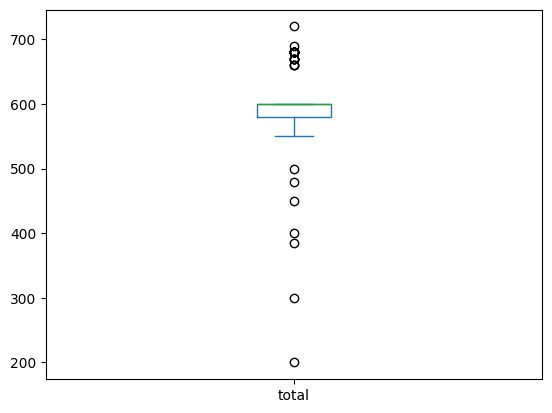

In [133]:
# Calcular la moda de la columna 'legendario_miticos'
moda_legendarios_miticos = legendarios_miticos['type1'].mode()
mediana = legendarios_miticos['total'].median()
media = legendarios_miticos['total'].mean()
varianza = legendarios_miticos['total'].var()
conteo_valores_unicos = legendarios_miticos['type1'].value_counts()
# legendarios_miticos['total'].plot.hist()
legendarios_miticos['total'].plot.box()
# Mostrar el resultado
print("La moda de 'legendario_miticos' es:", moda_legendarios_miticos)
print('La mediana del valor total de las características:', mediana)
print('La media del valor total de las características:', media)
print('La varianza entre el total de las caracteristicas de los pokemon es:', varianza)
print(conteo_valores_unicos)

- Tras averiguar los Legendarios mas fuertes por generación quise saber un poco más sobre estos, averiguando así la media de sus estadísticas totales, que el tipo psiquico es el más comun en los legendarios y visualizamos con un diagrama de cajas de bigote, en el cuál vemos una serie de outliers que procedemos a investigar.

In [134]:
top5_fuertes_total = legendarios_miticos.nlargest(5, 'total')
top5_fuertes_total

,index,name,rank,generation,evolves_from,type1,type2,hp,atk,def,spatk,spdef,speed,total
492,493,Arceus,Mythical,4,Original,Normal,Normal,120,120,120,120,120,120,720
889,890,Eternatus,Legendary,8,Original,Poison,Dragon,140,85,95,145,95,130,690
149,150,Mewtwo,Legendary,1,Original,Psychic,Psychic,106,110,90,154,90,130,680
248,249,Lugia,Legendary,2,Original,Psychic,Flying,106,90,130,90,154,110,680
249,250,Ho-Oh,Legendary,2,Original,Fire,Flying,106,130,90,110,154,90,680


In [135]:
bottom_7_total = legendarios_miticos.nsmallest(7, 'total')
bottom_7_total

,index,name,rank,generation,evolves_from,type1,type2,hp,atk,def,spatk,spdef,speed,total
788,789,Cosmog,Legendary,7,Original,Psychic,Psychic,43,29,31,29,31,37,200
807,808,Meltan,Mythical,7,Original,Steel,Steel,46,65,65,55,35,34,300
890,891,Kubfu,Legendary,8,Original,Fighting,Fighting,60,90,60,53,50,72,385
789,790,Cosmoem,Legendary,7,Cosmog,Psychic,Psychic,43,29,131,29,131,37,400
1023,1024,Terapagos,Legendary,9,Original,Normal,Normal,90,65,85,65,85,60,450
488,489,Phione,Mythical,4,Original,Water,Water,80,80,80,80,80,80,480
897,898,Calyrex,Legendary,8,Original,Psychic,Grass,100,80,80,80,80,80,500


- Tras analizar de dónde proceden esos outliers encontramos que incluso los pokemon legendarios pueden evolucionar, lo que explica los outliers por abajo, siendo pokemon, que a pesar de ser legendarios, aún tienen que desarrollar sus límites. Los outliers por arriba son los pokemon legendarios más fuertes, con lo que podríamos determinar que el pokemon mas poderoso, objetivamente, es ARCEUS. 
<center>
!<br><img src="data/img/pngwing.com (5).png" alt="arceus" width="200"/>
<center>

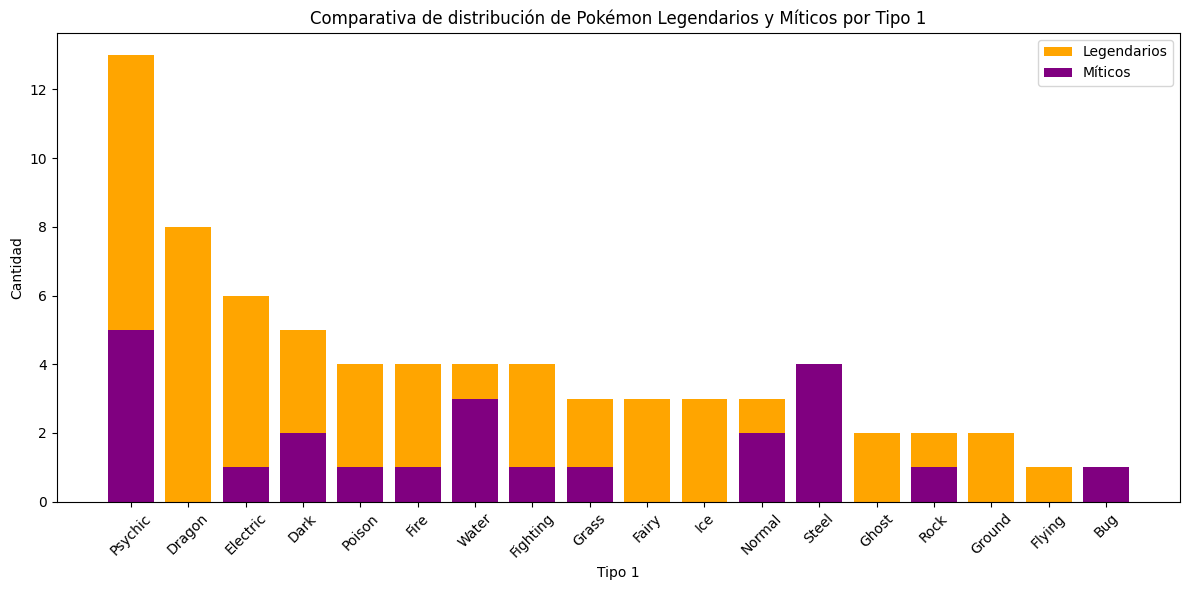

In [136]:
# Obtener la cantidad de Pokémon legendarios y míticos por tipo 1
legendarios_por_tipo = legendarios['type1'].value_counts()
miticos_por_tipo = miticos['type1'].value_counts()

# Crear un gráfico de barras comparativo
plt.figure(figsize=(12, 6))

# Barra para Pokémon legendarios
plt.bar(legendarios_por_tipo.index, legendarios_por_tipo.values, color='Orange', label='Legendarios')

# Barra para Pokémon míticos
plt.bar(miticos_por_tipo.index, miticos_por_tipo.values, color='Purple', label='Míticos')

# Añadir título y etiquetas de ejes
plt.title('Comparativa de distribución de Pokémon Legendarios y Míticos por Tipo 1')
plt.xlabel('Tipo 1')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visualización
plt.legend()  # Mostrar leyenda

# Mostrar el gráfico
plt.tight_layout()
plt.show()


- Vamos acabando este EDA por el mundo Pokemon, visualizando graficamente algunos de los datos que hemos ido encontrando analizando los legendarios:
    - En el gráfico de la celda superior vemos una comparativa de la distribución de legendarios y miticos por tipo.
    - En el gráfico inferior, podremos comparar mediante un diagrama de dispersion los diferentes totales distinguiendo de legendarios y míticos, en este diagrama vemos como a pesar de que los pokemon miticos menos en cantidad, no tienen nada que envidiar en poder a los legendarios, siendo un pokemon mitico el más fuerte de todos, como ya hemos visto. Por ultimo, cabe destacar que la media de valores totales en los pokemon miticos está por encima de los legendarios.

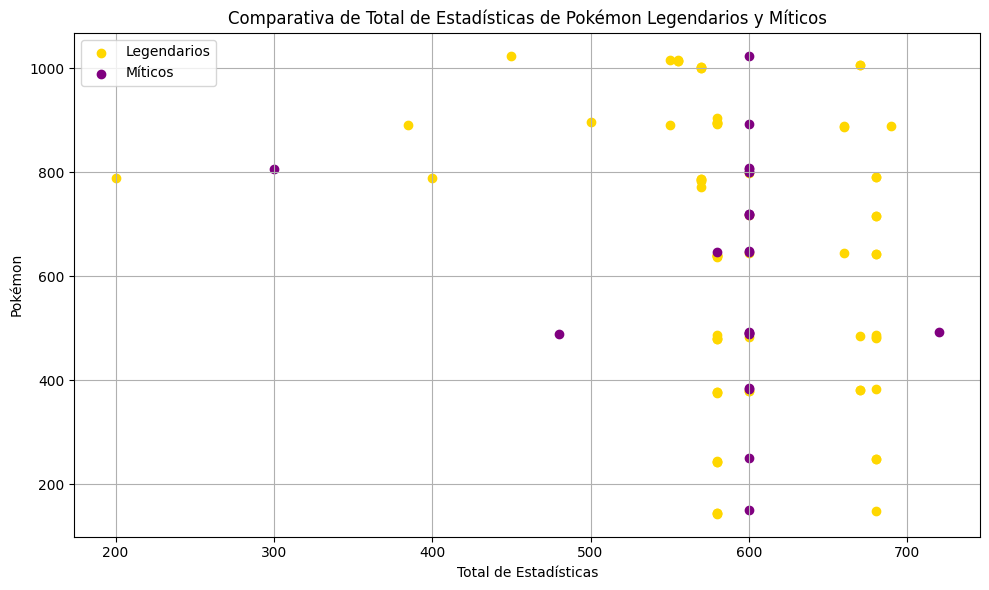

In [137]:
# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))

# Scatter plot para Pokémon legendarios
plt.scatter(legendarios['total'], legendarios.index, color='gold', label='Legendarios')

# Scatter plot para Pokémon míticos
plt.scatter(miticos['total'], miticos.index, color='purple', label='Míticos')

# Añadir título y etiquetas de los ejes
plt.title('Comparativa de Total de Estadísticas de Pokémon Legendarios y Míticos')
plt.xlabel('Total de Estadísticas')
plt.ylabel('Pokémon')
plt.legend()  # Mostrar leyenda

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()


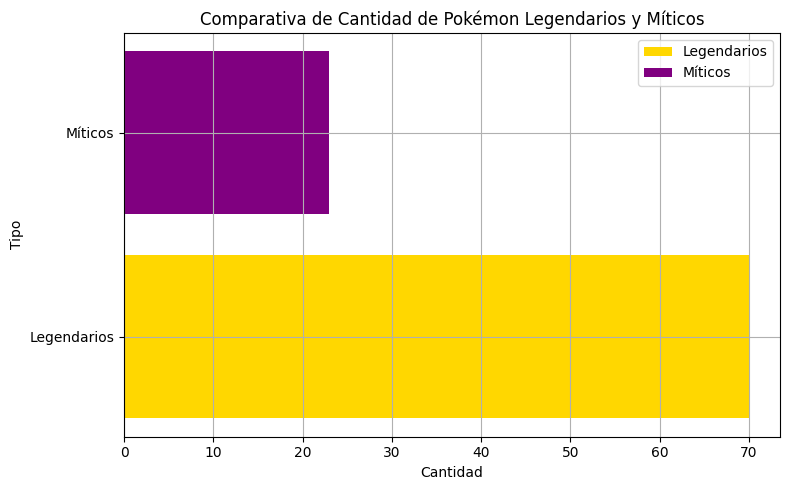

In [138]:
# Contar la cantidad de legendarios y míticos
legendarios_count = len(legendarios)
miticos_count = len(miticos)

# Crear el gráfico de barras horizontales
plt.figure(figsize=(8, 5))

# Barras para Pokémon legendarios
plt.barh('Legendarios', legendarios_count, color='gold', label='Legendarios')

# Barras para Pokémon míticos
plt.barh('Míticos', miticos_count, color='purple', label='Míticos')

# Añadir título y etiquetas de los ejes
plt.title('Comparativa de Cantidad de Pokémon Legendarios y Míticos')
plt.xlabel('Cantidad')
plt.ylabel('Tipo')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

- En estas gráficas de barras horizontales: 
    - La superior representa una comparación del numero total de legendarios y miticos, viendo así la diferencia en los números.
    - La superior, similar a la anterior, representa los valores totales de cada pokemon separados por su grupo, legendarios o miticos. Aquí vemos claramente y, confirmamos, que los pokemon miticos, a pesar de ser menos en cantidad, no tienen nada que envidiar en cuanto a poder se refiere, siendo unos pocos legendarios los que puedan alardear de tener más poder que la mayoría de miticos, excepto el todo poderoso Arceus.

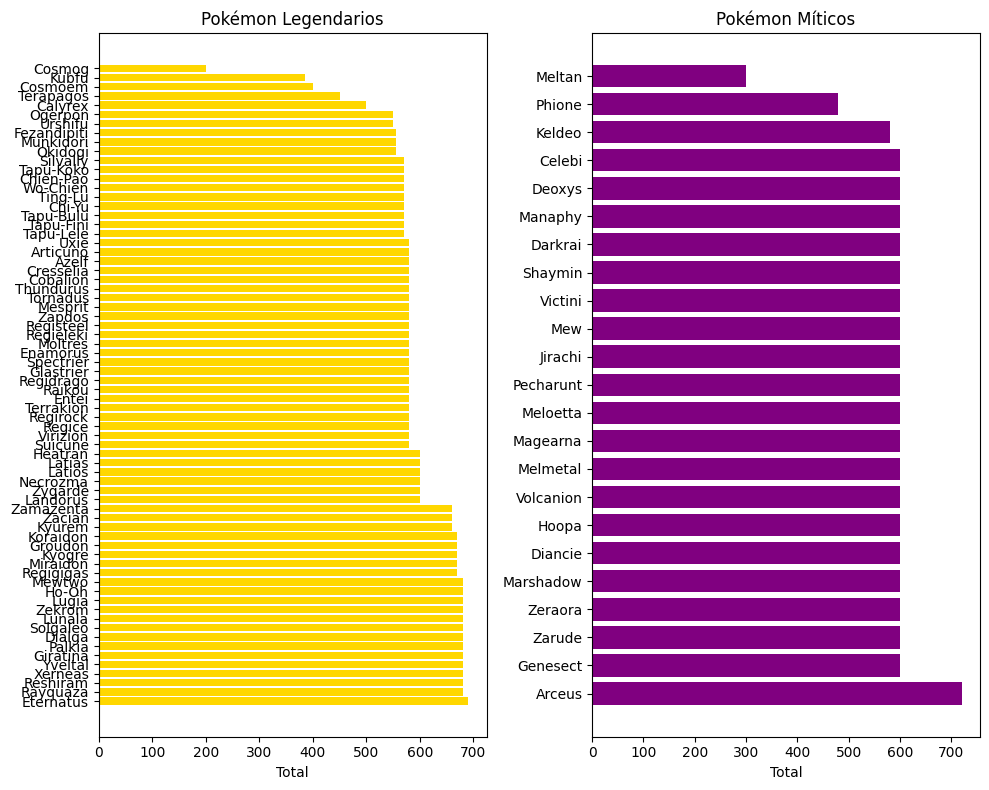

In [139]:
# Filtrar los datos para obtener solo legendarios y míticos
legendarios_miticos = pokemon[(pokemon['rank'] == 'Legendary') | (pokemon['rank'] == 'Mythical')]

# Ordenar los datos por la columna "total"
legendarios_miticos = legendarios_miticos.sort_values(by='total', ascending=False)

# Crear la figura y los subplots
fig, ax = plt.subplots(figsize=(10, 8), nrows=1, ncols=2)

# Graficar las barras horizontales para los legendarios
ax[0].barh(legendarios_miticos[legendarios_miticos['rank'] == 'Legendary']['name'], 
           legendarios_miticos[legendarios_miticos['rank'] == 'Legendary']['total'], 
           color='gold')
ax[0].set_xlabel('Total')
ax[0].set_title('Pokémon Legendarios')

# Graficar las barras horizontales para los míticos
ax[1].barh(legendarios_miticos[legendarios_miticos['rank'] == 'Mythical']['name'], 
           legendarios_miticos[legendarios_miticos['rank'] == 'Mythical']['total'], 
           color='purple')
ax[1].set_xlabel('Total')
ax[1].set_title('Pokémon Míticos')

# Ajustar espaciado entre subplots
plt.tight_layout()

# Mostrar la gráfica
plt.show()


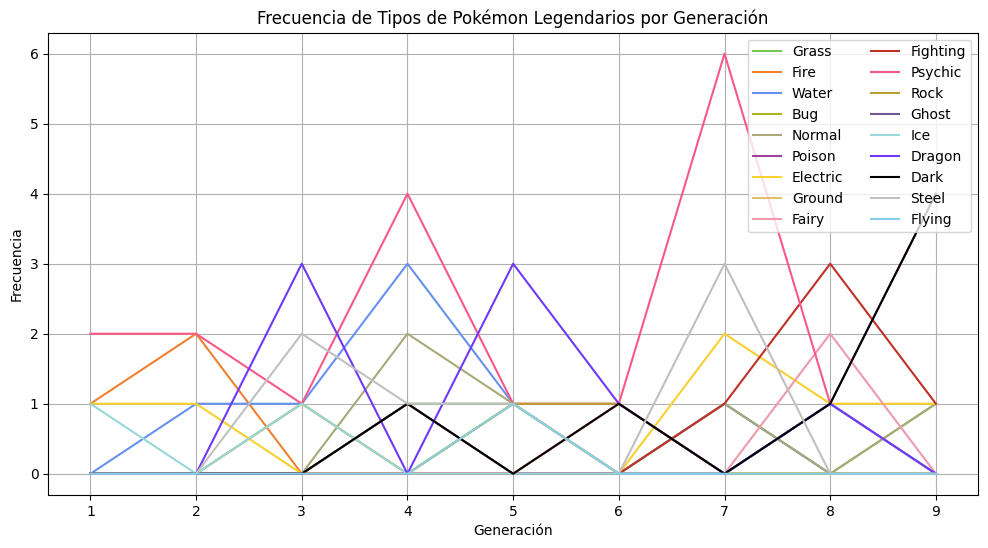

In [140]:
# Obtener la frecuencia de cada tipo de Pokémon ('type1') en cada generación
frecuencia_por_tipo_y_generacion = {}
for tipo in pokemon['type1'].unique():
    frecuencia_por_generacion = []
    for generacion in range(1, 10):
        cantidad = len(legendarios_miticos[(legendarios_miticos['generation'] == generacion) & (legendarios_miticos['type1'] == tipo)])
        frecuencia_por_generacion.append(cantidad)
    frecuencia_por_tipo_y_generacion[tipo] = frecuencia_por_generacion

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6))

for i, (tipo, frecuencia_por_generacion) in enumerate(frecuencia_por_tipo_y_generacion.items()):
    color = pkmn_colores[i % len(pkmn_colores)]  # Ciclar a través de los colores si hay más tipos que colores
    ax.plot(range(1, 10), frecuencia_por_generacion, label=tipo, color=color)

ax.set_xlabel('Generación')
ax.set_ylabel('Frecuencia')
ax.set_title('Frecuencia de Tipos de Pokémon Legendarios por Generación')
ax.legend(loc='upper right', bbox_to_anchor=(1, 1), ncol=2)
plt.xticks(range(1, 10))
plt.grid(True)
plt.savefig('./data/img/lineas_tiposlegenarios.png', transparent=True)# Guardar la gráfica como imagen
plt.show()

- Estas dos últimas gráficas:
    - La de arriba es una gráfica de lineas, que personalmente me gusta mucho, que representa el numero de legendarios que hay por tipo y generación. Se visualiza la distribución de legendaios a lo largo de las generaciones y como han variados los tipos de estos.
    - La de abajo es la misma información pero representada con un grafico de barras apiladas, por si el entrenador que vea esto no lo veo suficientemente claro con el gráfico de lineas.

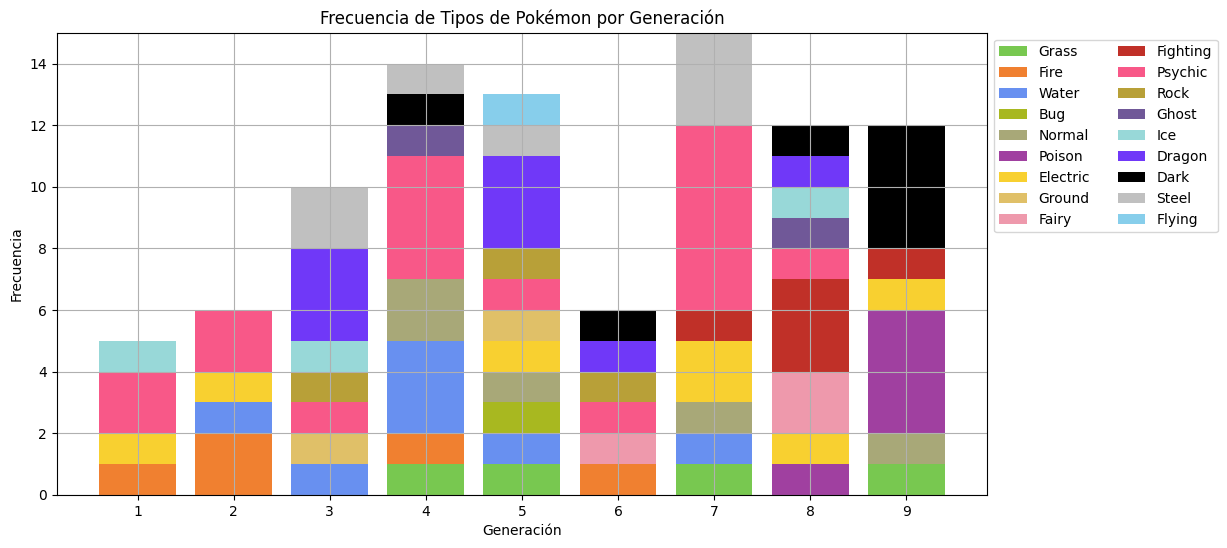

In [141]:
# Obtener la frecuencia de cada tipo de Pokémon ('type1') en cada generación
frecuencia_por_tipo_y_generacion = {}
for tipo in pokemon['type1'].unique():
    frecuencia_por_generacion = []
    for generacion in range(1, 10):
        cantidad = len(legendarios_miticos[(legendarios_miticos['generation'] == generacion) & (legendarios_miticos['type1'] == tipo)])
        frecuencia_por_generacion.append(cantidad)
    frecuencia_por_tipo_y_generacion[tipo] = frecuencia_por_generacion

# Convertir los datos en un formato adecuado para el gráfico de barras apiladas
generaciones = range(1, 10)
tipos = list(frecuencia_por_tipo_y_generacion.keys())
frecuencias = np.array([frecuencia_por_tipo_y_generacion[tipo] for tipo in tipos])

# Crear el gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(generaciones, frecuencias[0], label=tipos[0], color=pkmn_colores[0])
for i in range(1, len(tipos)):
    ax.bar(generaciones, frecuencias[i], bottom=np.sum(frecuencias[:i], axis=0), label=tipos[i], color=pkmn_colores[i])

ax.set_xlabel('Generación')
ax.set_ylabel('Frecuencia')
ax.set_title('Frecuencia de Tipos de Pokémon por Generación')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=2)
plt.xticks(range(1, 10))
plt.grid(True)
plt.show()

## Gracias por haber leído hasta aquí, entrenador, tras este análisis exploratorio de datos curiosos como el pokemon con mas evoluciones o el tipo predominante y tambien hemos encontrado datos relevantes a la hora de hacerte maestro pokemon, como el estilo de juego más favorable, los mejores pokemon para cada atributo, pero sobretodo, concluimos encontrando nuestro objetivo, el mejor pokemon objetivamente. 
 <center>
    <img src="data/img/pngwing.com (2).png" alt="pika2" width="200"/>
</center>

## Pero digo objetivamente, porque en el apasionante mundo Pokémon no hay un solo "mejor" Pokémon. Cada uno tiene sus propias habilidades, estrategias y personalidad. Arceus puede ser el Pokémon más poderoso en términos de estadísticas, pero eso no significa que sea el más adecuado para cada situación. Al final del día, lo que realmente importa es el vínculo entre el entrenador y su Pokémon, la estrategia que utilizan en la batalla y los momentos compartidos en su viaje juntos. Así que, ¡sigamos entrenando, explorando y descubriendo nuevos Pokémon y aventuras!
 <center>
    <img src="data/img/pngwing.com (4).png" alt="pika4" width="200"/>
</center>